Bethe ansatz solver for the Dirac delta potential.

Set up

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Nov 20 21:31:20 2022

@author: Darren
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats
from scipy import misc

plt.rcParams['font.size'] = '14'

#Size of the box
boxSize = 200
#Density d = N/L, N is the number of particles in the system
densities = np.linspace(0, 3.5, 100)

#The integers/quantum numbers
def ints(N):
    return np.arange(-(N-1)/2, (N-1)/2+1, 1)

#(Vectorised) Bethe ansatz equations
def BAeqs(x):
    deltaXs = x-x[:, np.newaxis]
    thetaMat = θ(deltaXs)
    equations = x - 2*np.pi/boxSize * ints(np.size(x)) - np.sum(thetaMat, axis=0)/boxSize
    return equations

#Total energy
def energy(p):
    return 0.5*np.sum(np.square(p))

#Total momentum
def momentum(p):
    return np.sum(p)

Phase shift (for δ-potential v(r)=cδ(r))

In [2]:
def θ(x):
    if c==0:
        p = -np.pi*np.sign(x)
    else:
        p = -2*np.arctan(x/c)
    return p

Exact solution of e0(d) for inverse-square potential

In [3]:
def solution(x):
    return (np.pi**2)*(x**3)*(c**2)/6

Selected cs

In [4]:
cs = np.array([0, 0.5, 1, 1.5, 2])

Phase shift Graph

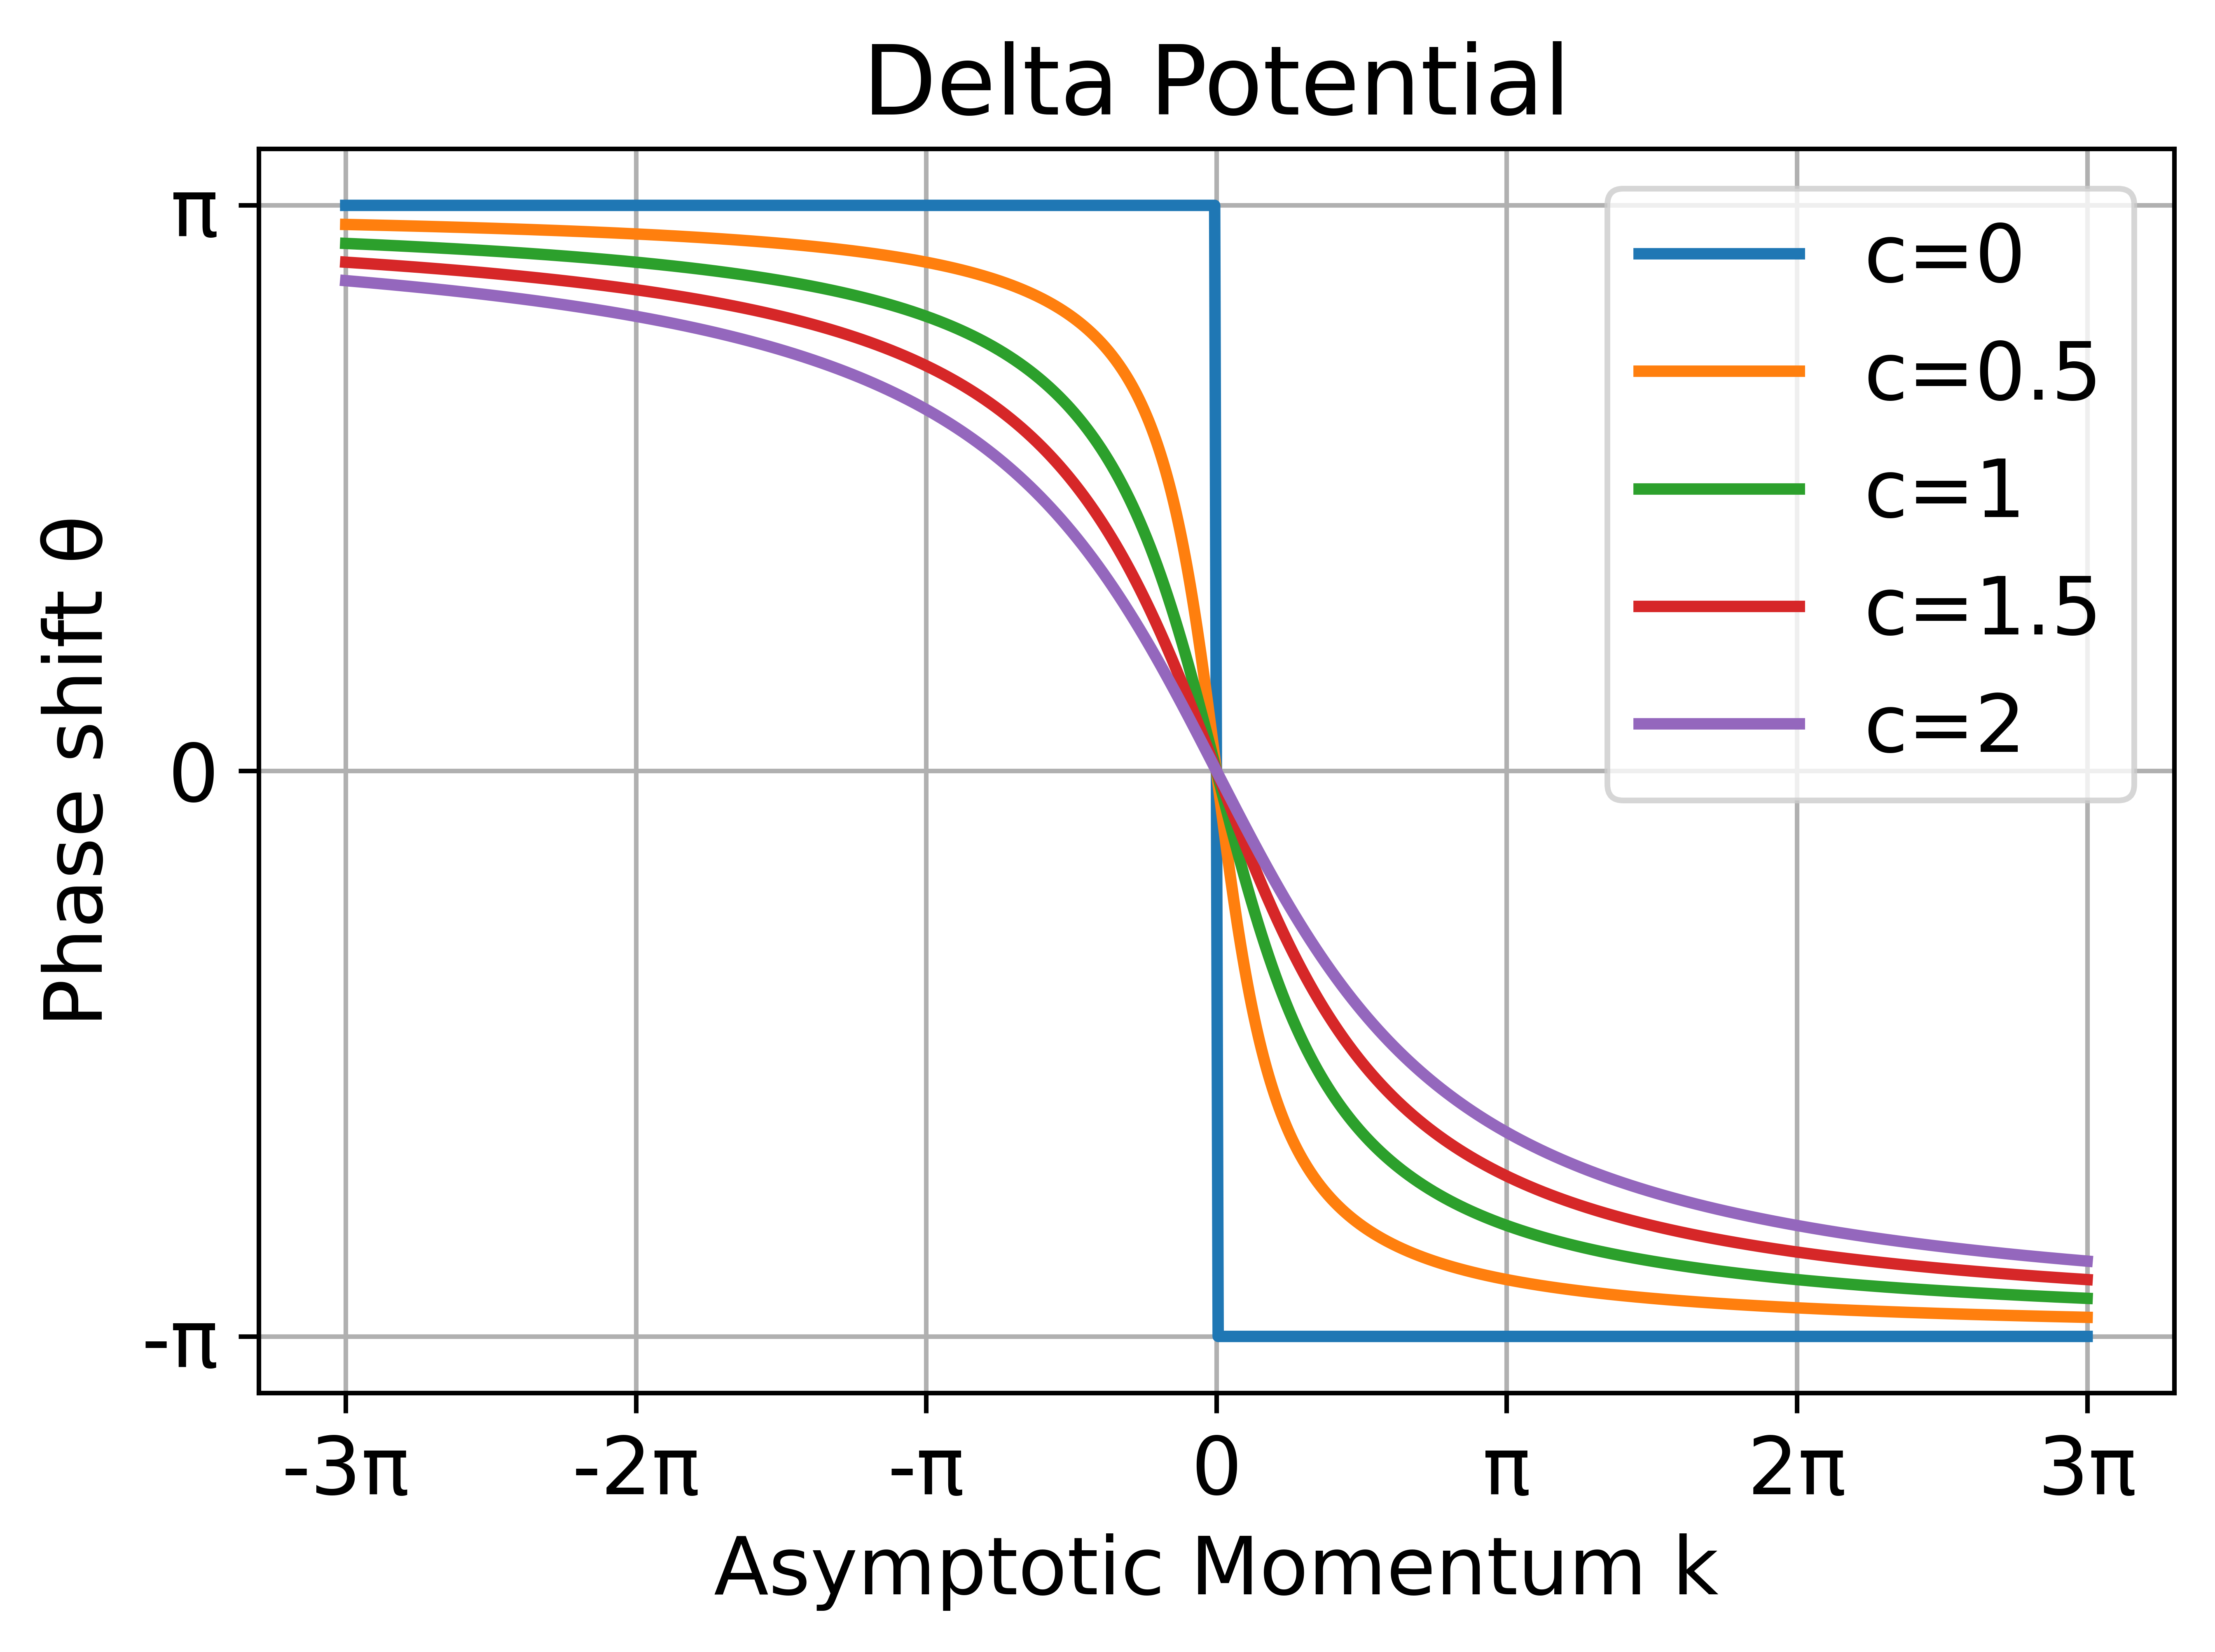

In [5]:
plt.figure(dpi=1000)
plt.xlabel('Asymptotic Momentum k')
plt.ylabel('Phase shift θ')
plt.title('Delta Potential')
ksForPlot = np.linspace(-3*np.pi, 3*np.pi, 1001)

for i in range(np.size(cs)):
    c = cs[i]
    plt.plot(ksForPlot, θ(ksForPlot), label = "c=%g"%cs[i], linewidth = 2)

plt.xticks(np.arange(-3*np.pi, 3*np.pi+np.pi, step=(np.pi)), ['-3π','-2π','-π','0','π','2π','3π'])
plt.yticks(np.arange(-np.pi, np.pi+np.pi, step=(np.pi)), ['-π','0','π'])
plt.grid()
plt.legend()
plt.show()

Derivative of phase shift

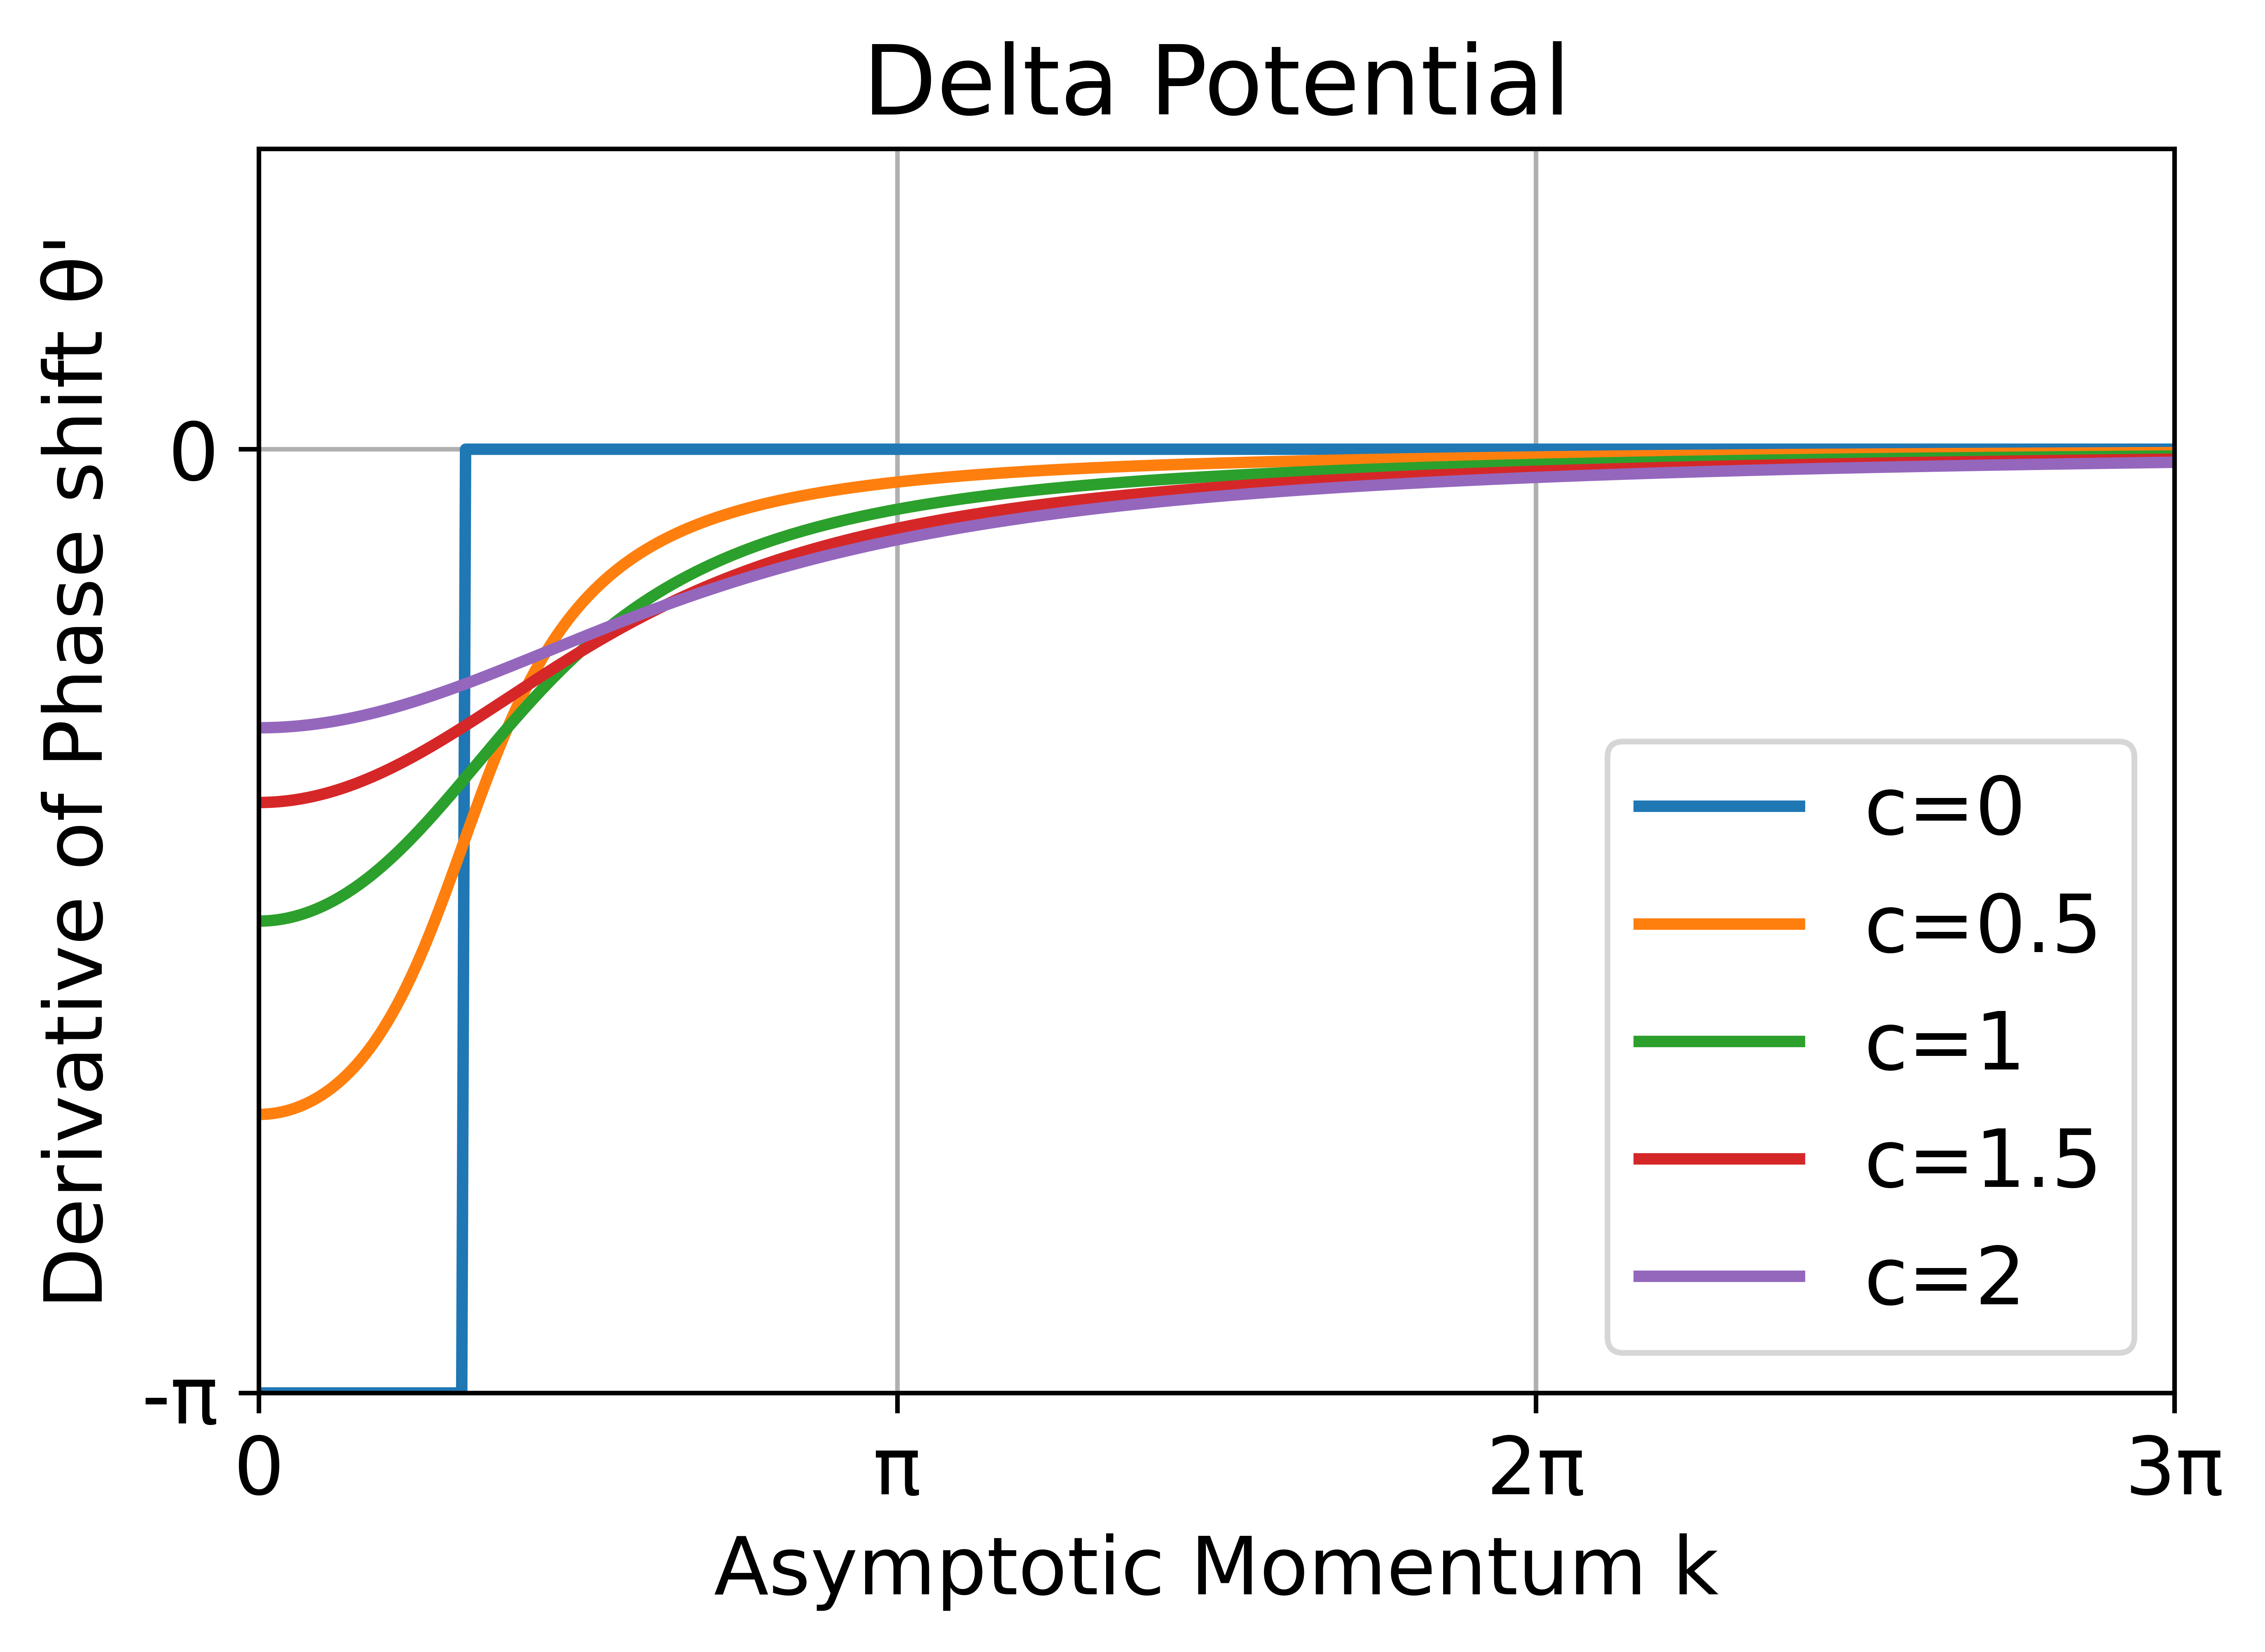

In [6]:
plt.figure(dpi=1000)
plt.xlabel('Asymptotic Momentum k')
plt.ylabel('Derivative of Phase shift θ\'')
plt.title('Delta Potential')
ksForPlot = np.linspace(-3*np.pi, 3*np.pi, 1001)

for i in range(np.size(cs)):
    c = cs[i]
    plt.plot(ksForPlot, misc.derivative(θ, ksForPlot), label = "c=%g"%cs[i], linewidth = 2)

plt.xticks(np.arange(-3*np.pi, 3*np.pi+np.pi, step=(np.pi)), ['-3π','-2π','-π','0','π','2π','3π'])
plt.yticks(np.arange(-np.pi, np.pi+np.pi, step=(np.pi)), ['-π','0','π'])
plt.grid()
plt.xlim(0, 3*np.pi)
plt.ylim(-np.pi, 1)
plt.legend()
plt.show()

Solving

In [7]:
# e0 = []
# ks = []
# normks = []
# for i in cs:
#     arr = []
#     arr1 = []
#     arr2 = []
#     for j in range(np.size(densities)):
#         N = int(densities[j] * boxSize)
#         c = i
#         init = 2*np.pi*ints(N)/boxSize
#         if N!=0:
#             sol = optimize.root(BAeqs, init, method = 'lm', tol = 1e-15)
#             k = sol.x
#             #k = optimize.newton_krylov(BAeqs, init, iter=50, method = 'minres')
#             if np.amax(k)!=0:
#                 normk = k /np.amax(k)
#             else:
#                 normk = k
#         else:
#             k=0
#             normk=0
#         arr1.append(k)
#         arr2.append(normk)
#         enr = energy(k)/boxSize
#         mom = momentum(k)
#         arr.append(enr)
#     e0.append(arr)
#     ks.append(arr1)
#     normks.append(arr2)

KeyboardInterrupt: 

Export data

In [ ]:
# file = open("delta ks.txt", "w+")
# content = str(ks)
# file.write(content)
# file.close

# file = open("delta normks.txt", "w+")
# content = str(normks)
# file.write(content)
# file.close

# file = open("delta e0.txt", "w+")
# content = str(e0)
# file.write(content)
# file.close

# np.save('delta ks.npy', ks)
# np.save('delta normks.npy', normks)
# np.save('delta e0.npy', e0)

Import data

In [8]:
ks = np.load('delta ks.npy', allow_pickle = True)
normks = np.load('delta normks.npy', allow_pickle = True)
e0 = np.load('delta e0.npy', allow_pickle = True)

Plotting e0(d)

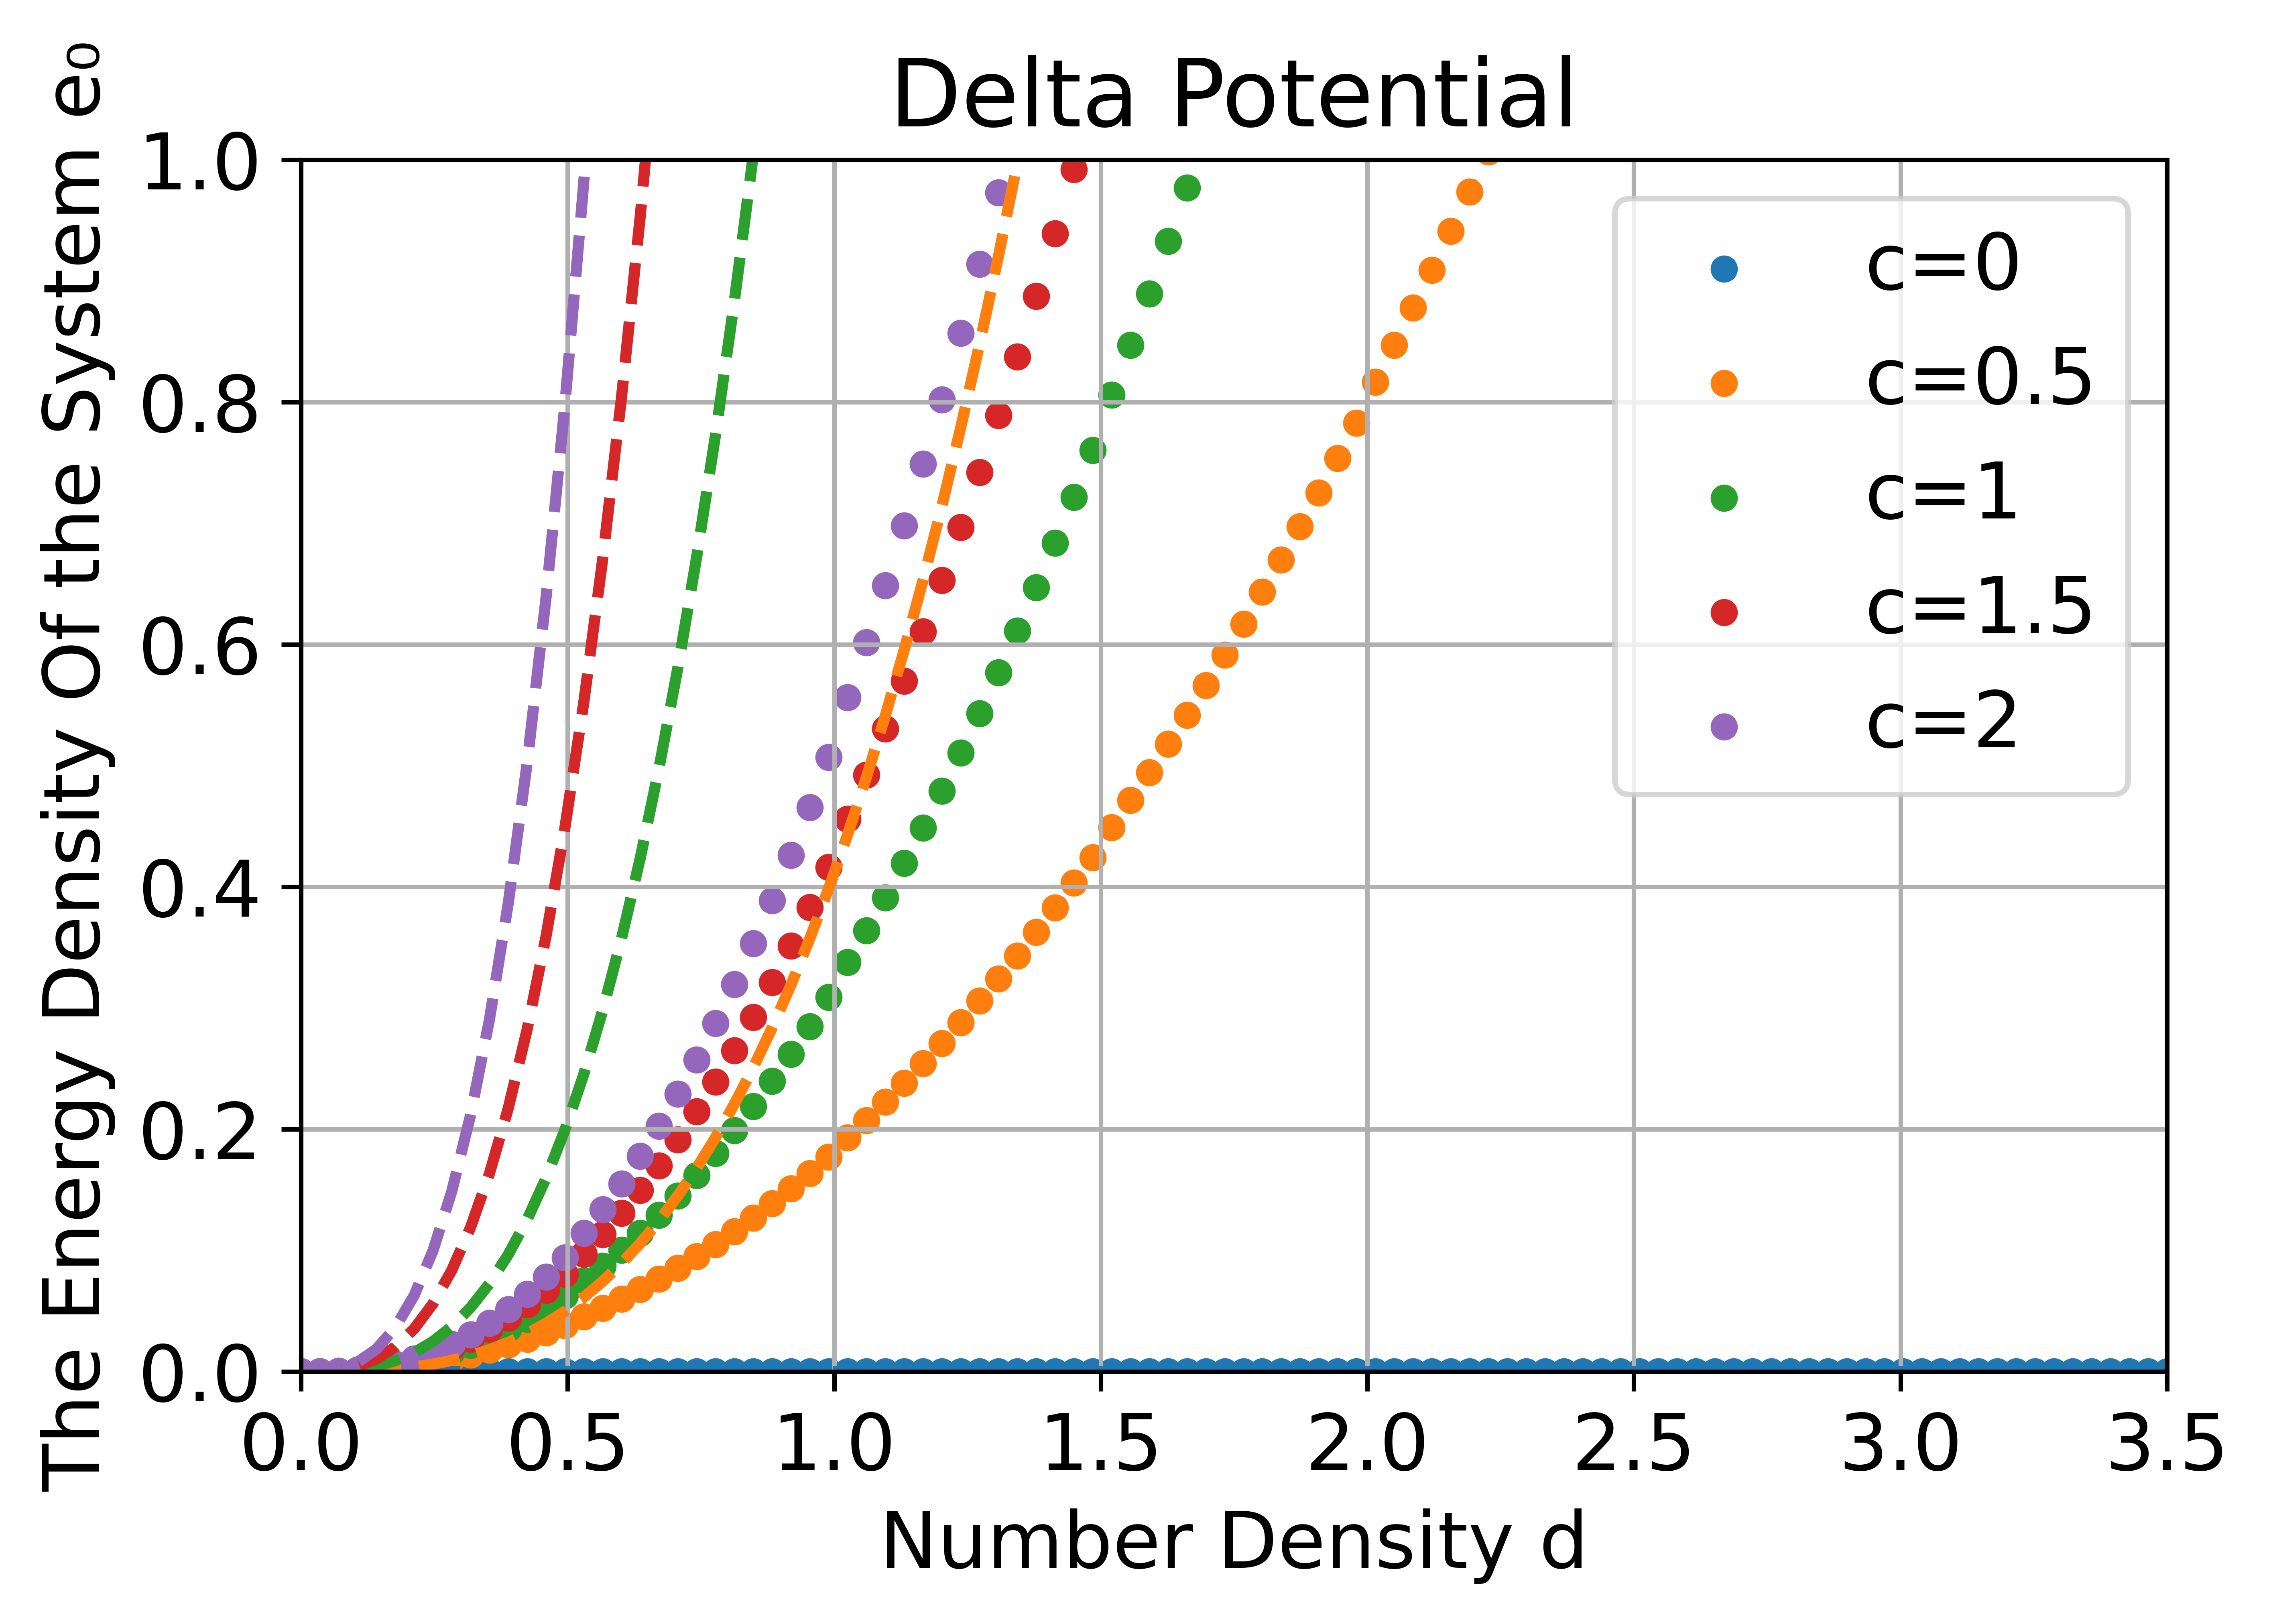

In [9]:
plt.figure(dpi=1000)
plt.rcParams['font.size'] = '14'
plt.xlabel('Number Density d')
plt.ylabel('The Energy Density Of the System e₀')
plt.title('Delta Potential')

for i in range(np.size(cs)):
     plt.scatter(densities, e0[i], label = "c=%g"%cs[i], s = 15)
    
for i in range(np.size(cs)):
     c = cs[i]
     plt.plot(densities, solution(densities), linewidth = 2, linestyle = 'dashed')

plt.grid()
plt.legend()
plt.xlim(0, 3.5)
plt.ylim(0,1)
plt.show()

log(e0) vs log(d)

<ipython-input-10-7ddd1d17f9ea>:8: RuntimeWarning: divide by zero encountered in log
  loge0 = np.log(newe0)
<ipython-input-10-7ddd1d17f9ea>:9: RuntimeWarning: divide by zero encountered in log
  logd = np.log(densities)


Slope =  2.0965502037944743
Intercept =  -1.6718016494668522
Slope =  2.138395984882299
Intercept =  -1.1005526419678342
Slope =  2.1713203890722657
Intercept =  -0.7903756751137336
Slope =  2.199544042504593
Intercept =  -0.58408233551496


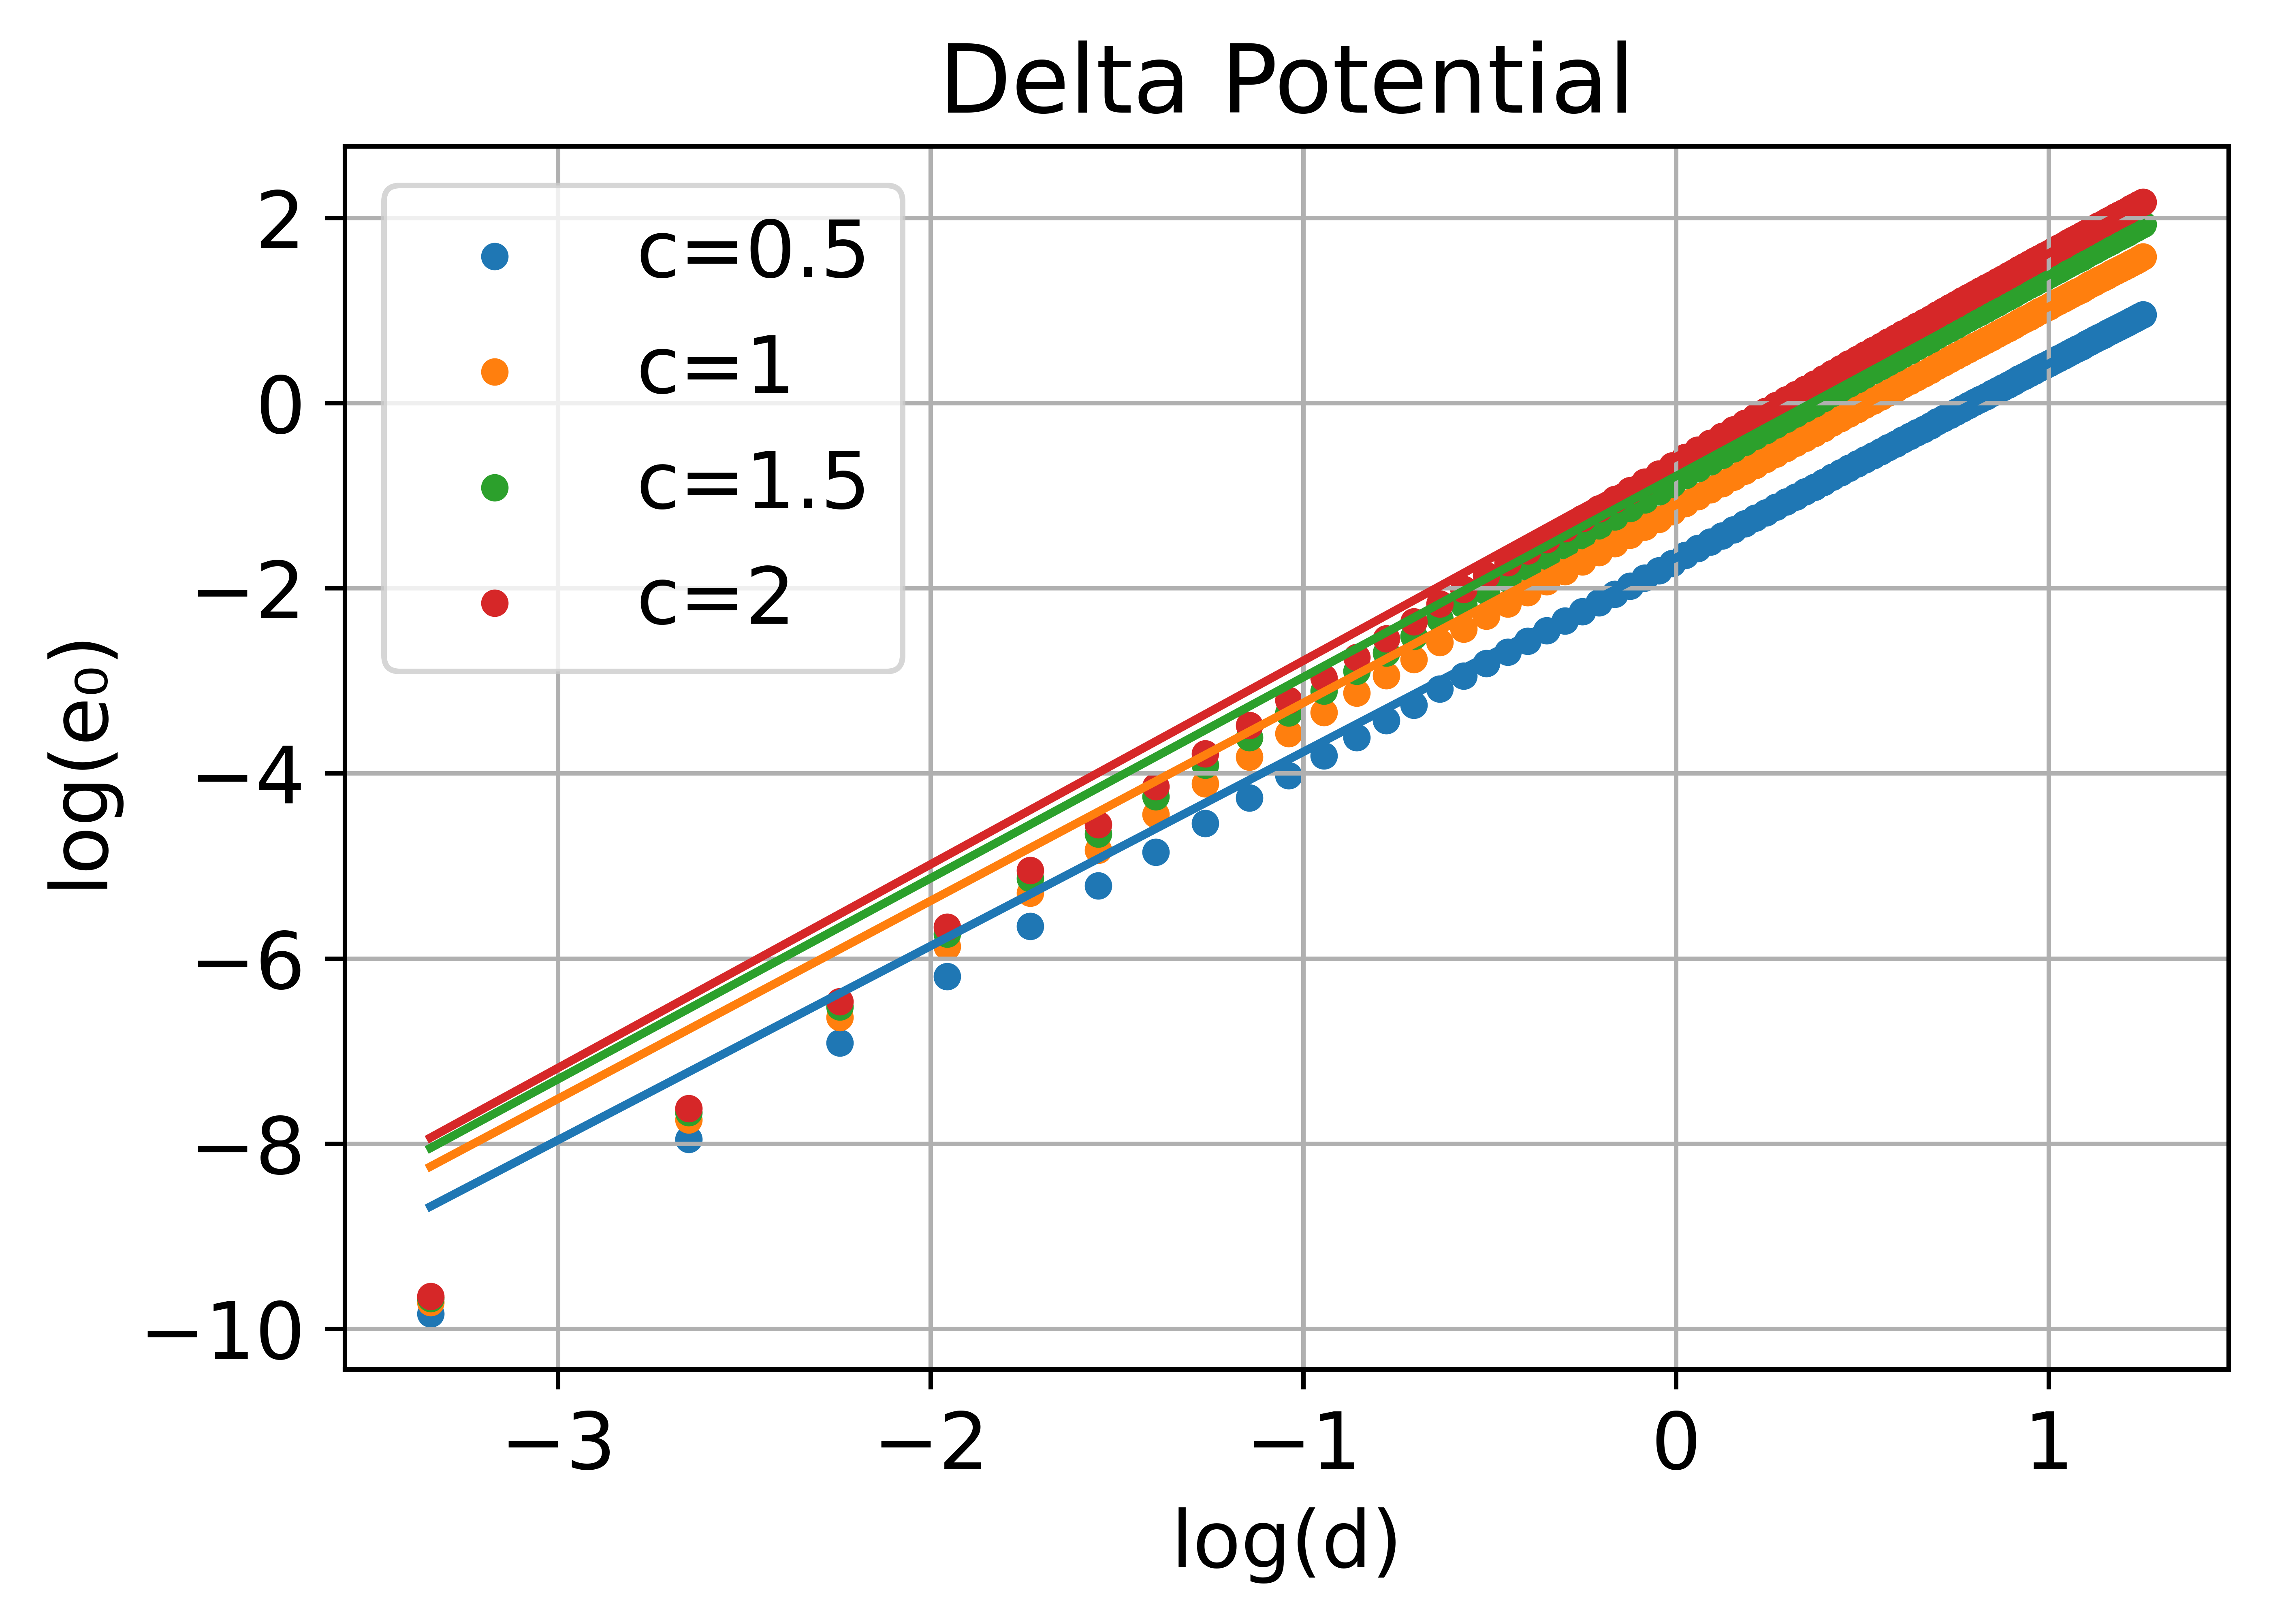

In [10]:
plt.figure(dpi=1000)
plt.rcParams['font.size'] = '14'
plt.xlabel('log(d)')
plt.ylabel('log(e₀)')
plt.title('Delta Potential')

newe0 = e0[1:]
loge0 = np.log(newe0)
logd = np.log(densities)

datapoints = 60

for i in range(np.size(cs)-1):
    plt.scatter(logd, loge0[i], label = "c=%g"%cs[i+1], s = 15)
    slope = stats.linregress(logd[datapoints:],loge0[i][datapoints:])[0]
    intercept = stats.linregress(logd[datapoints:],loge0[i][datapoints:])[1]
    print("Slope = ",slope)
    print("Intercept = ", intercept)
    plt.plot(logd, intercept+slope*logd)
    
for i in range(np.size(cs)-1):
    λ = cs[i+1]
    #plt.plot(logd, np.log(solution(densities)), linewidth = 2, linestyle = 'dashed')


plt.grid()
plt.legend()
plt.show()

Energy difference

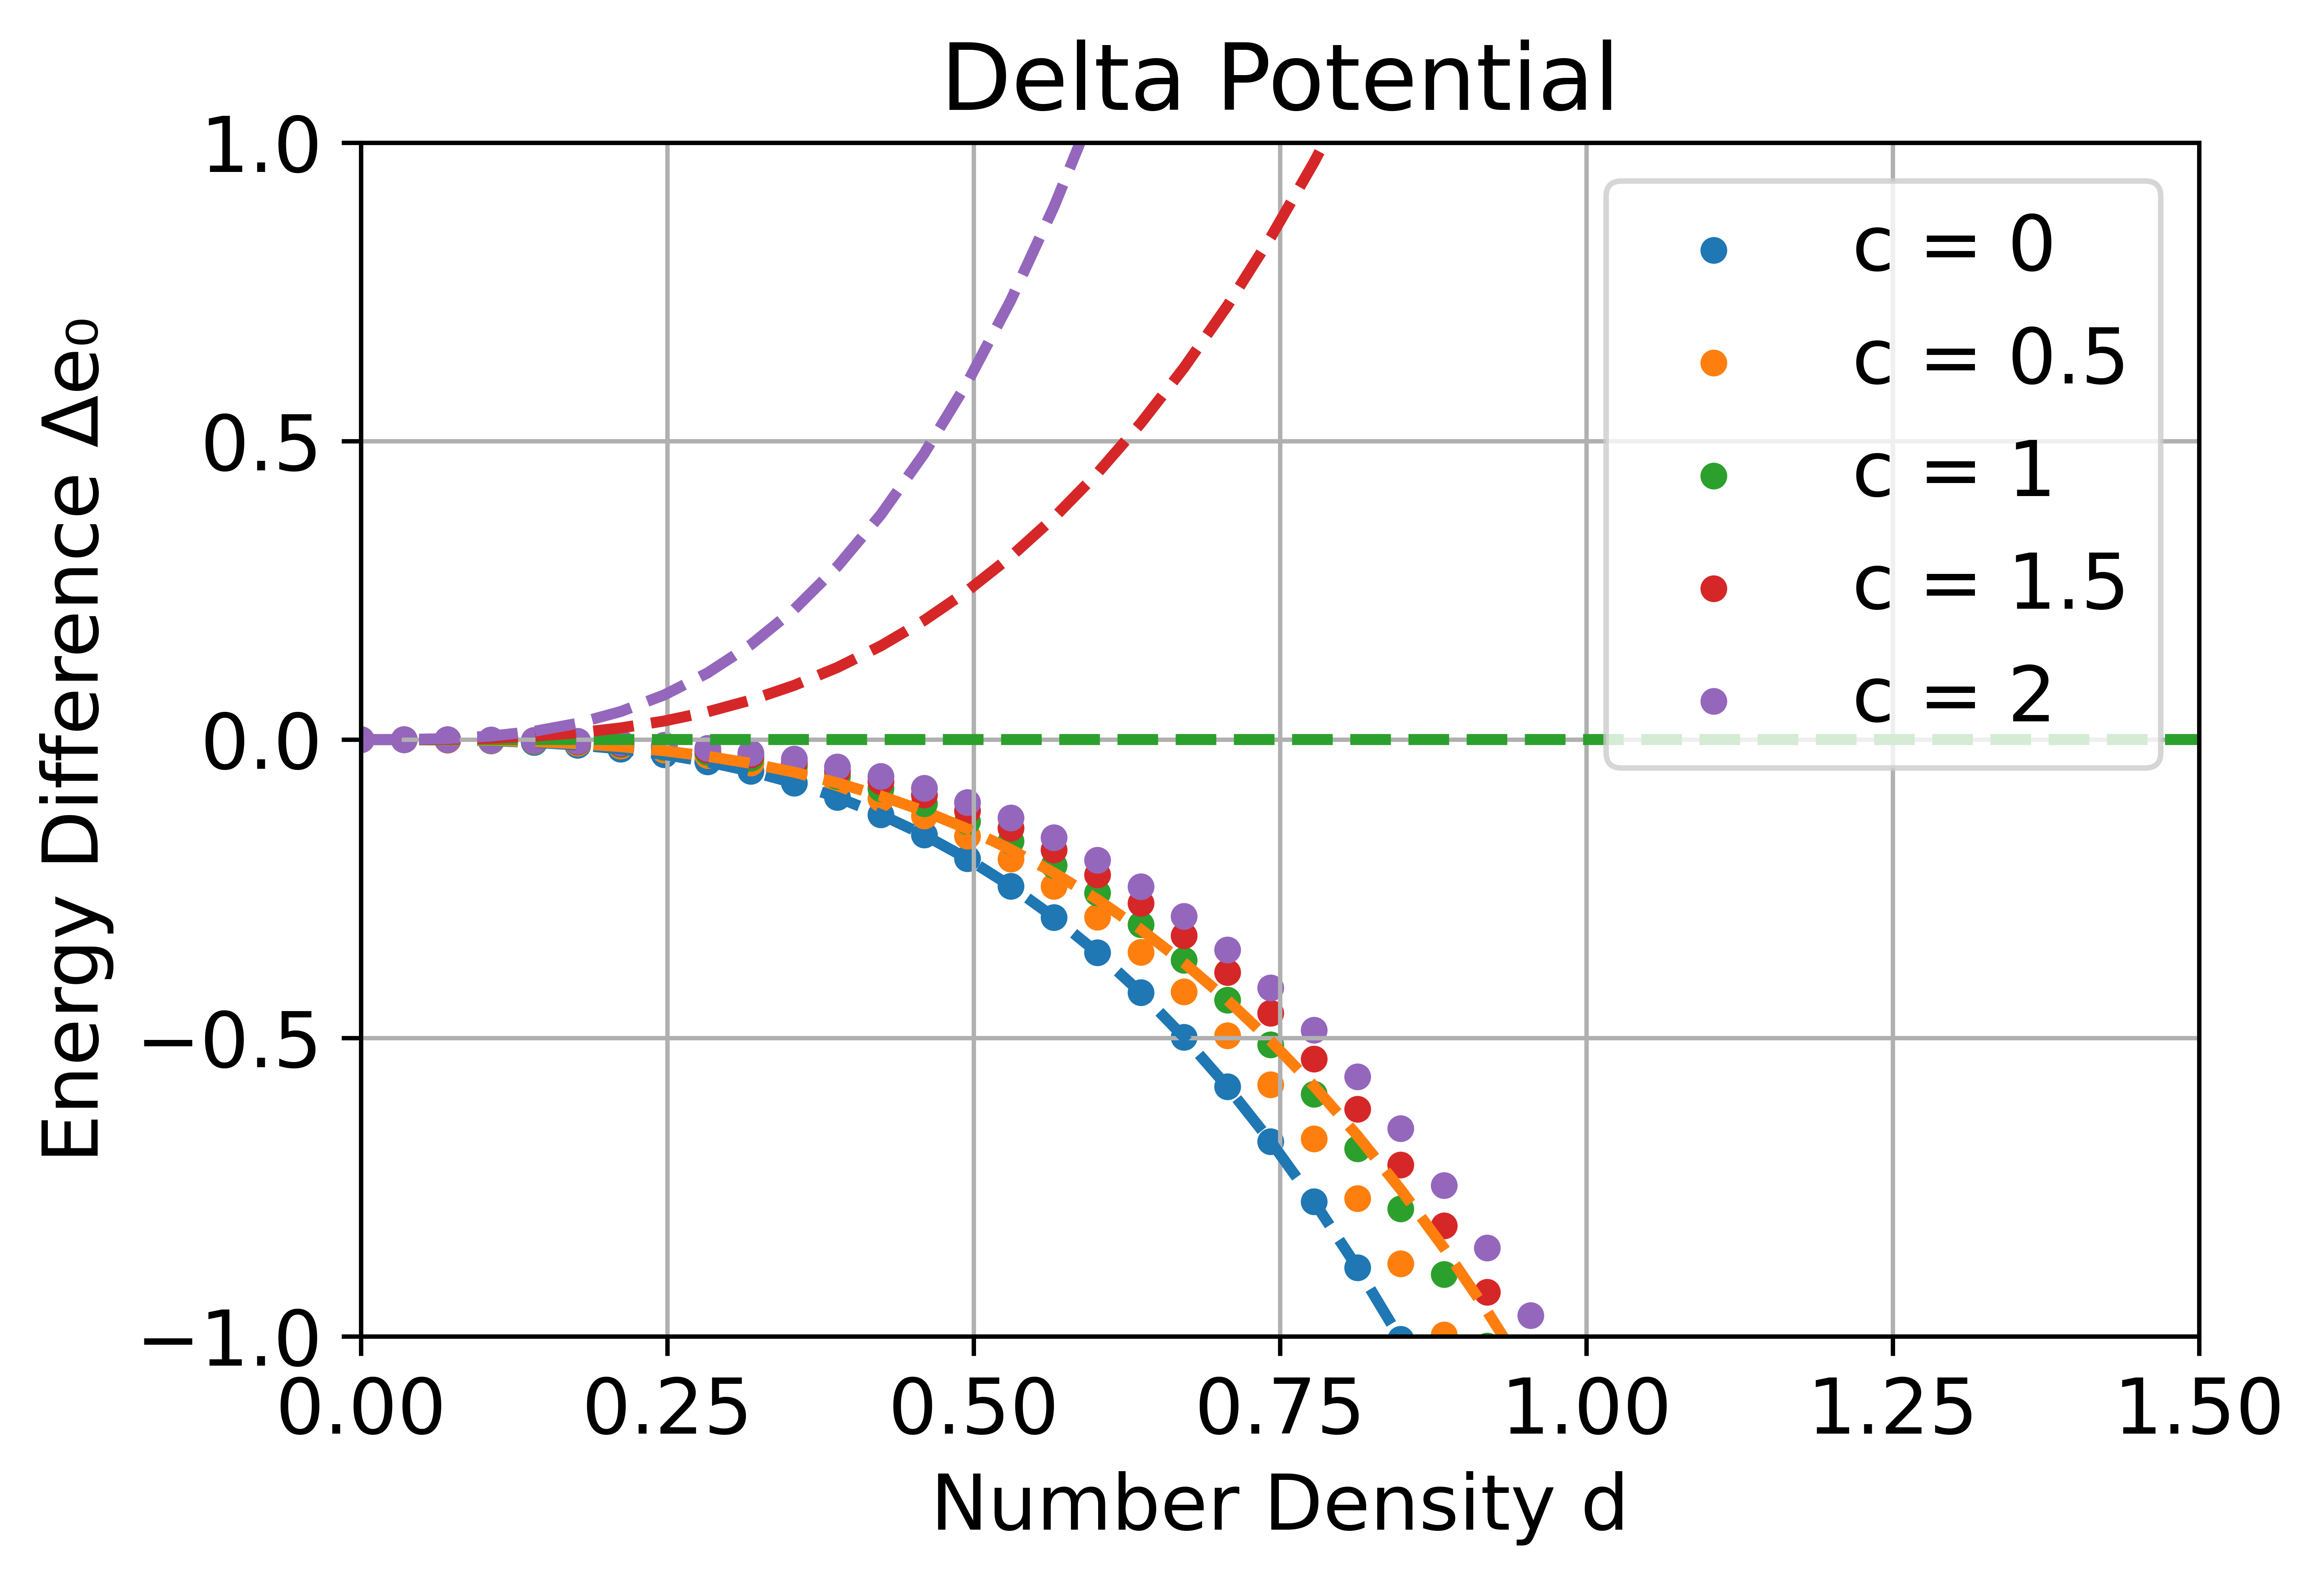

In [14]:
lambda1Index = np.where(cs==1)[0][0]
deltaEnergy = []
for i in range(np.size(cs)):
    c = cs[lambda1Index]
    deltaEnergy.append(e0[i]-solution(densities))

nonIntEner = solution(densities)
#print(deltaEnergy)
plt.figure(dpi=1000)
plt.xlabel('Number Density d')
plt.ylabel('Energy Difference Δe₀')
plt.title('Delta Potential')

for i in range(np.size(cs)):
    c = cs[i]
    plt.scatter(densities, deltaEnergy[i], label = 'c = %g'%cs[i], s = 15)
    plt.plot(densities, solution(densities)-nonIntEner, linewidth = 2, linestyle = 'dashed')
    
plt.xlim(0, 1.5)
plt.ylim(-1, 1)
plt.grid()
plt.legend()
plt.show()

Plotting lambda vs k

106


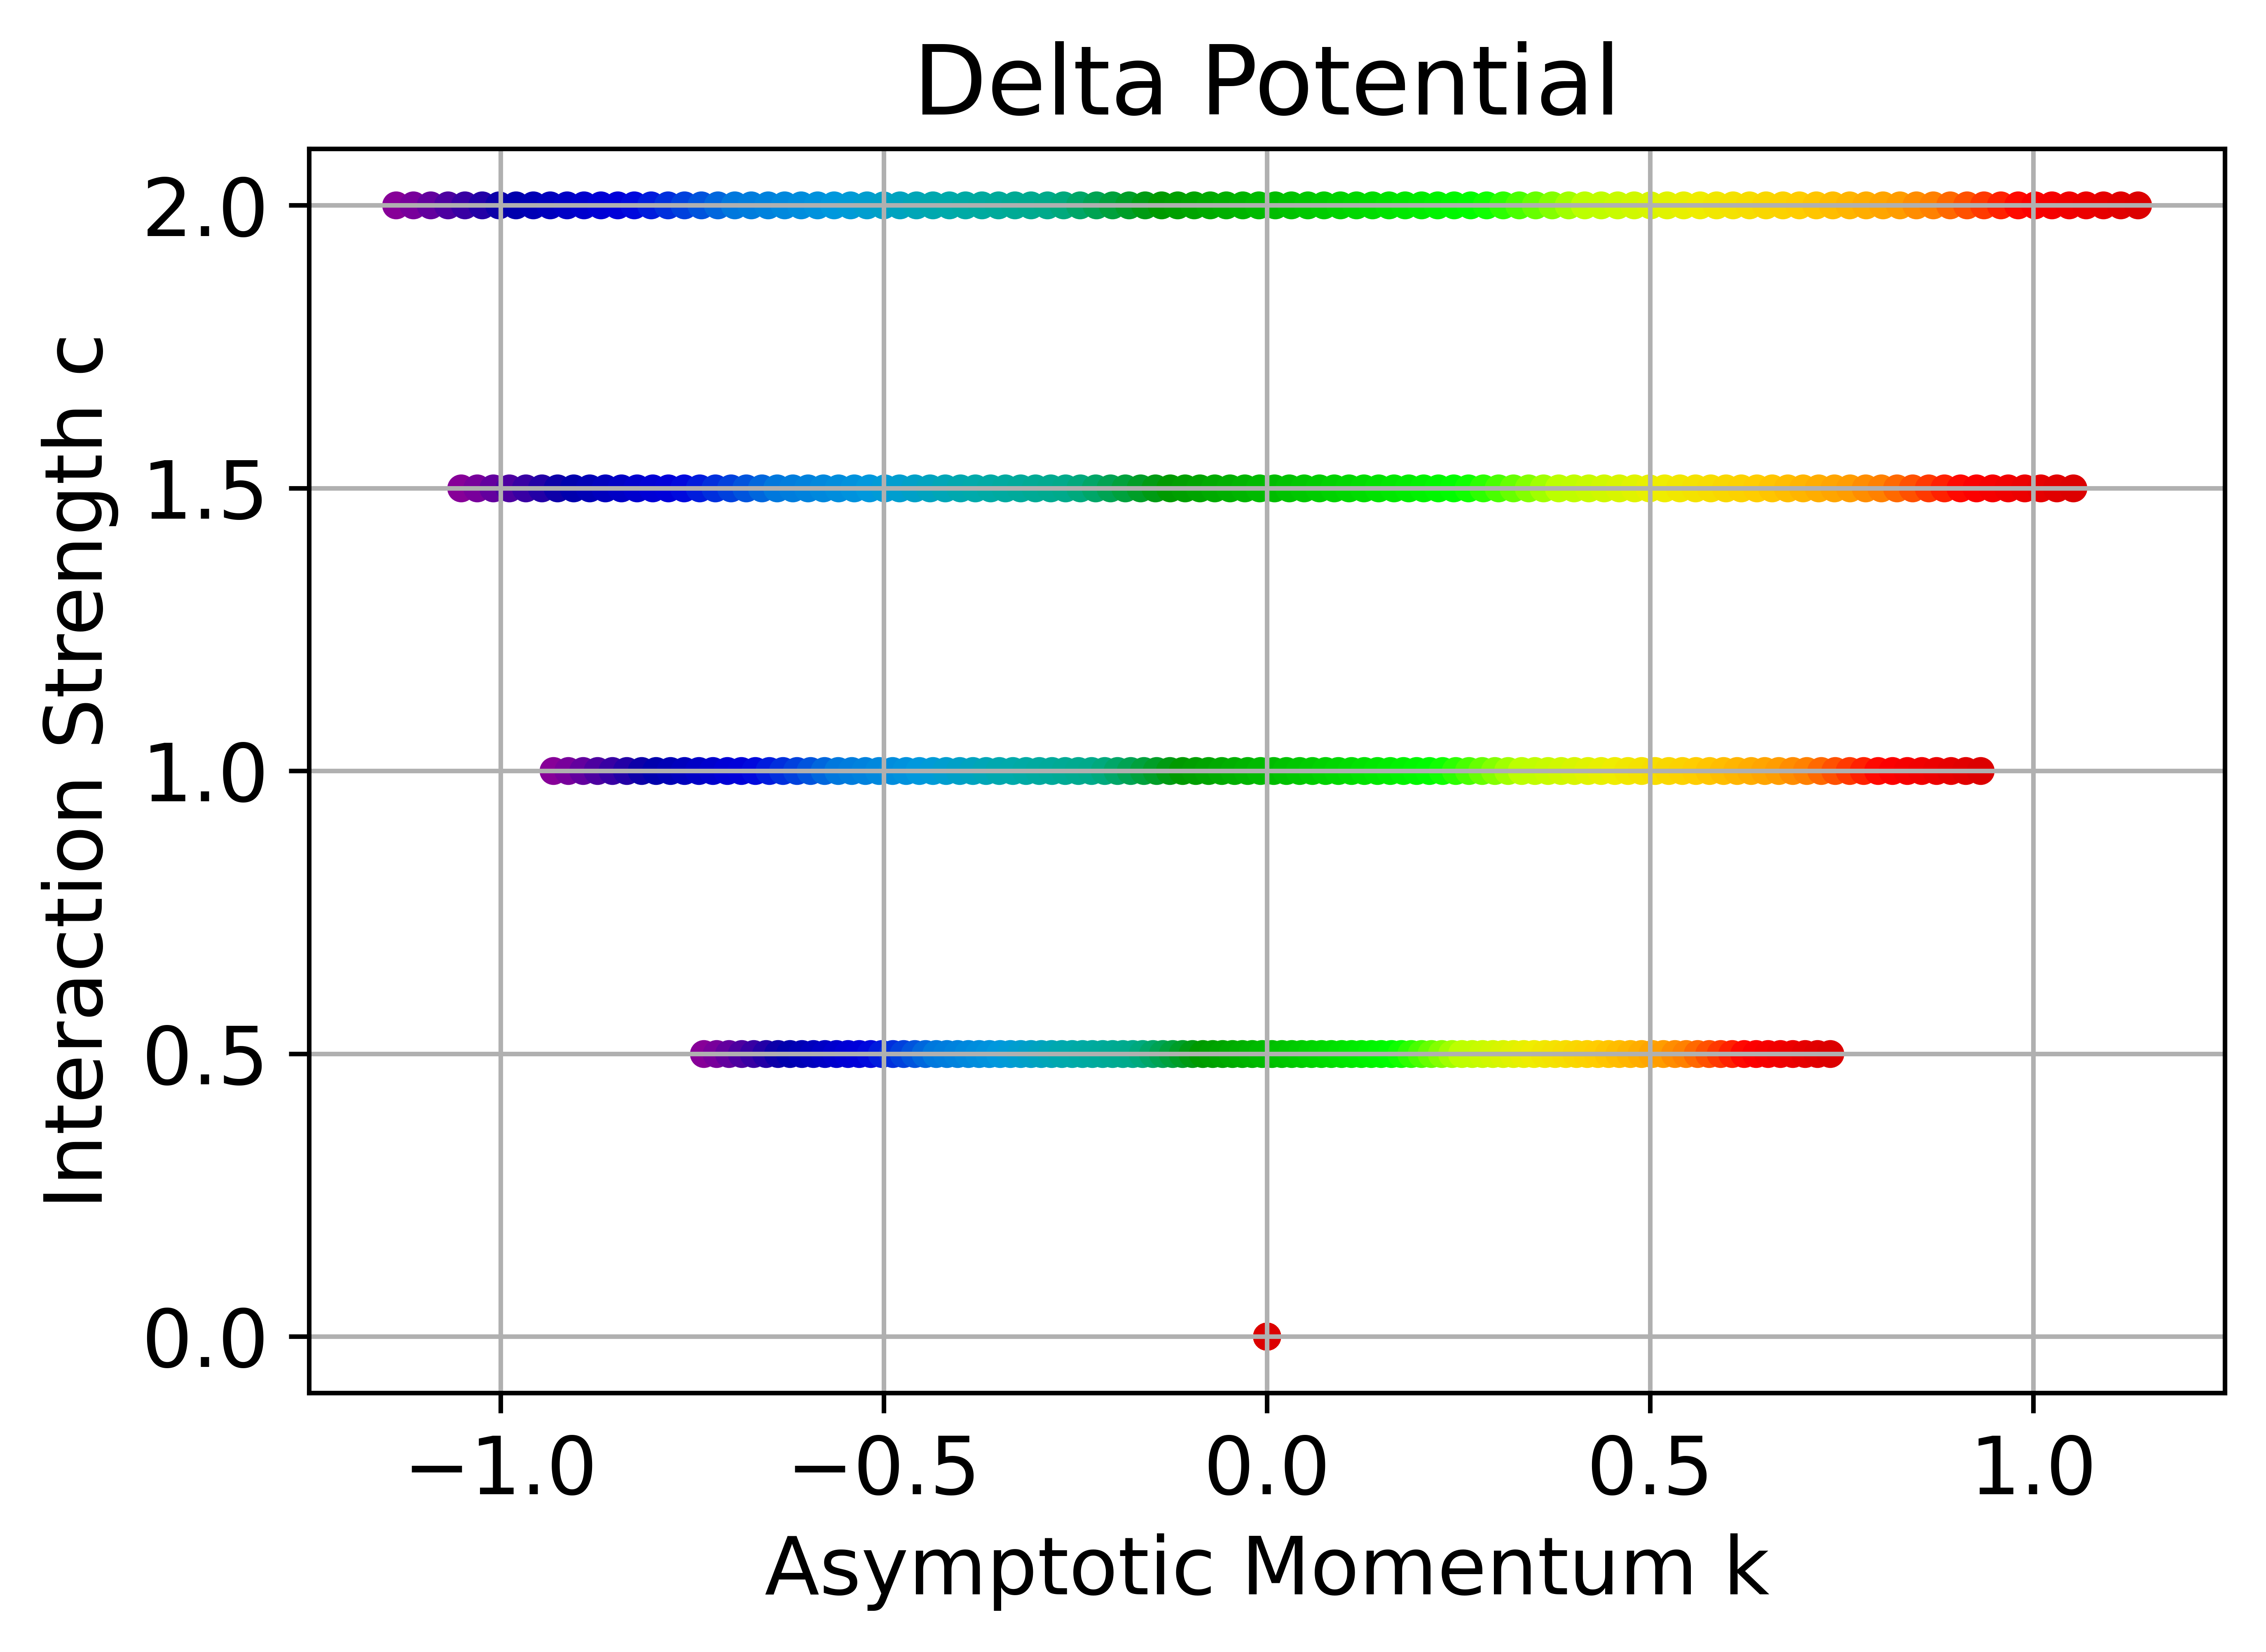

In [15]:
plt.figure(dpi=1000)
plt.yticks(cs)
plt.xlabel('Asymptotic Momentum k')
plt.ylabel('Interaction Strength c')
plt.title('Delta Potential')
numberOfParticles = int ((densities*boxSize)[15])

print(numberOfParticles)

colourmap = plt.cm.nipy_spectral
colours = colourmap(np.linspace(0.1, 0.9, numberOfParticles))

ksplot = np.array(np.transpose(ks), dtype = "object")
plotting = np.zeros((np.size(cs), numberOfParticles))

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 
for i in range(np.size(cs)):
    plotting[i] = ksplot[15][i]

for i in range(int(np.size(plotting)/np.size(cs))):
    plt.scatter(plotting[:, i], cs, color = colours[i], marker = "o", s=15)
    
plt.grid()
plt.show()



Exact density of momentum states ρ(k) in thermodynamic limit

Density of momentum states ρ(k) plots

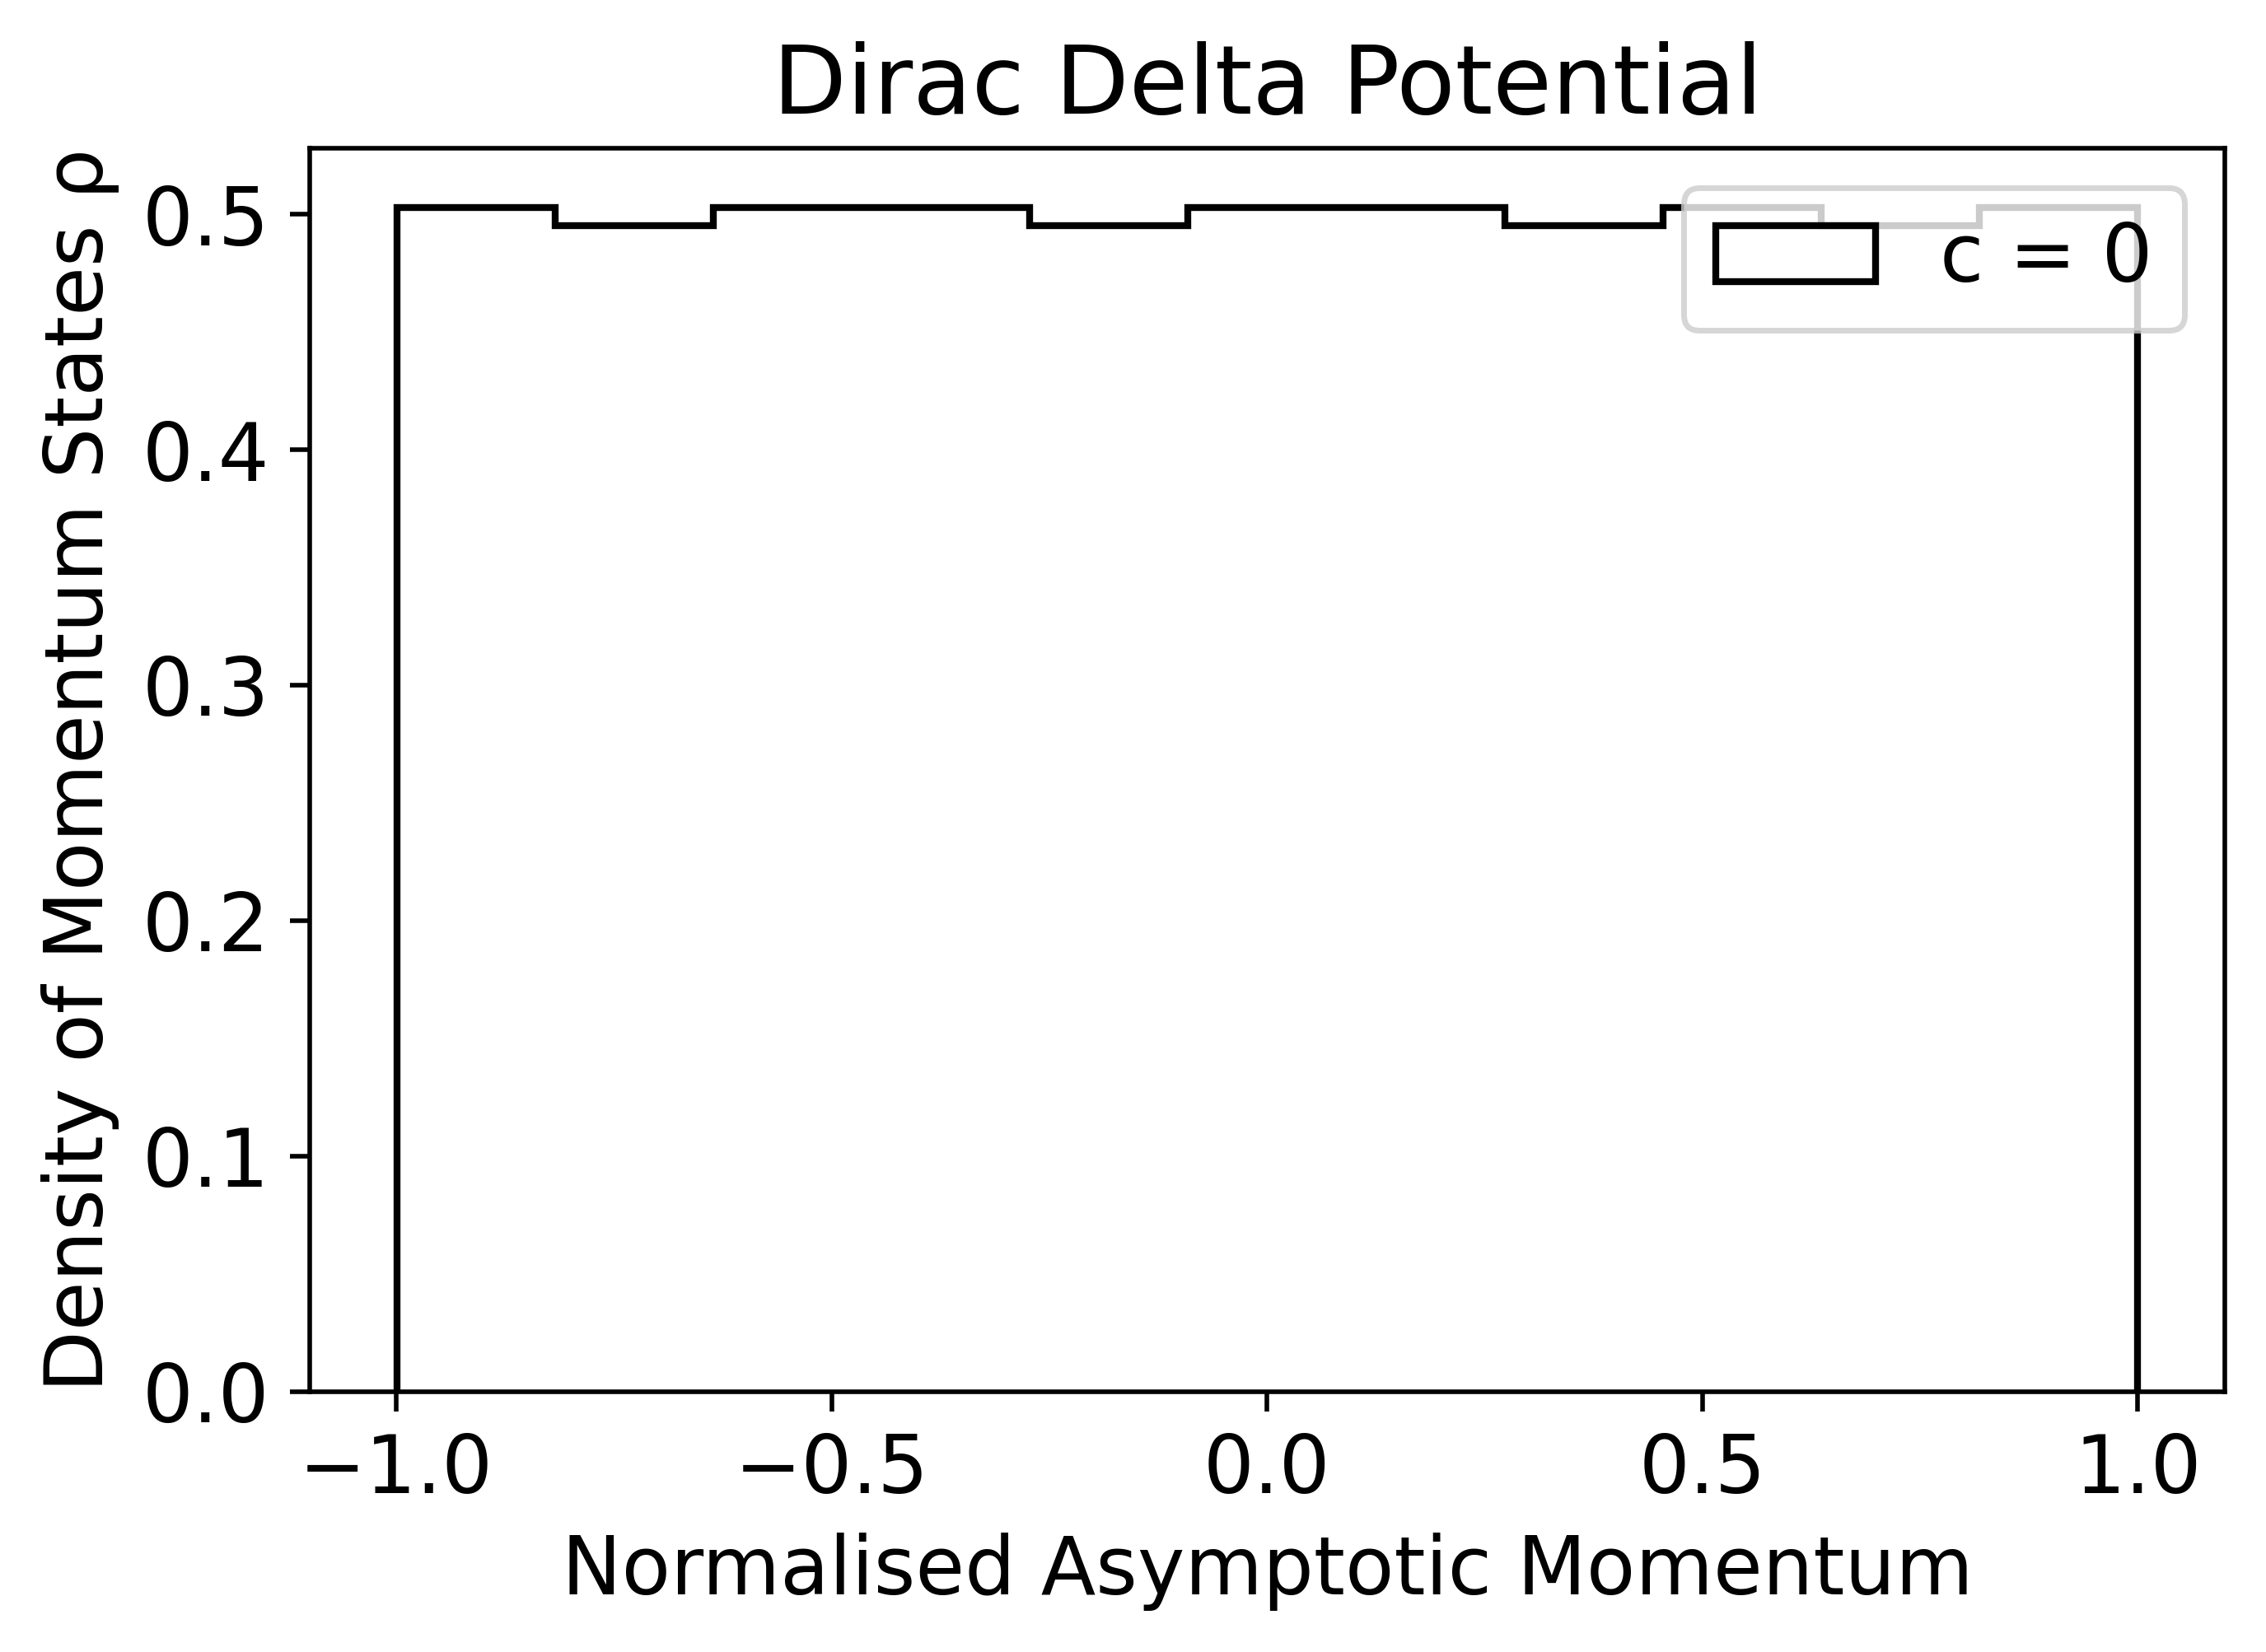

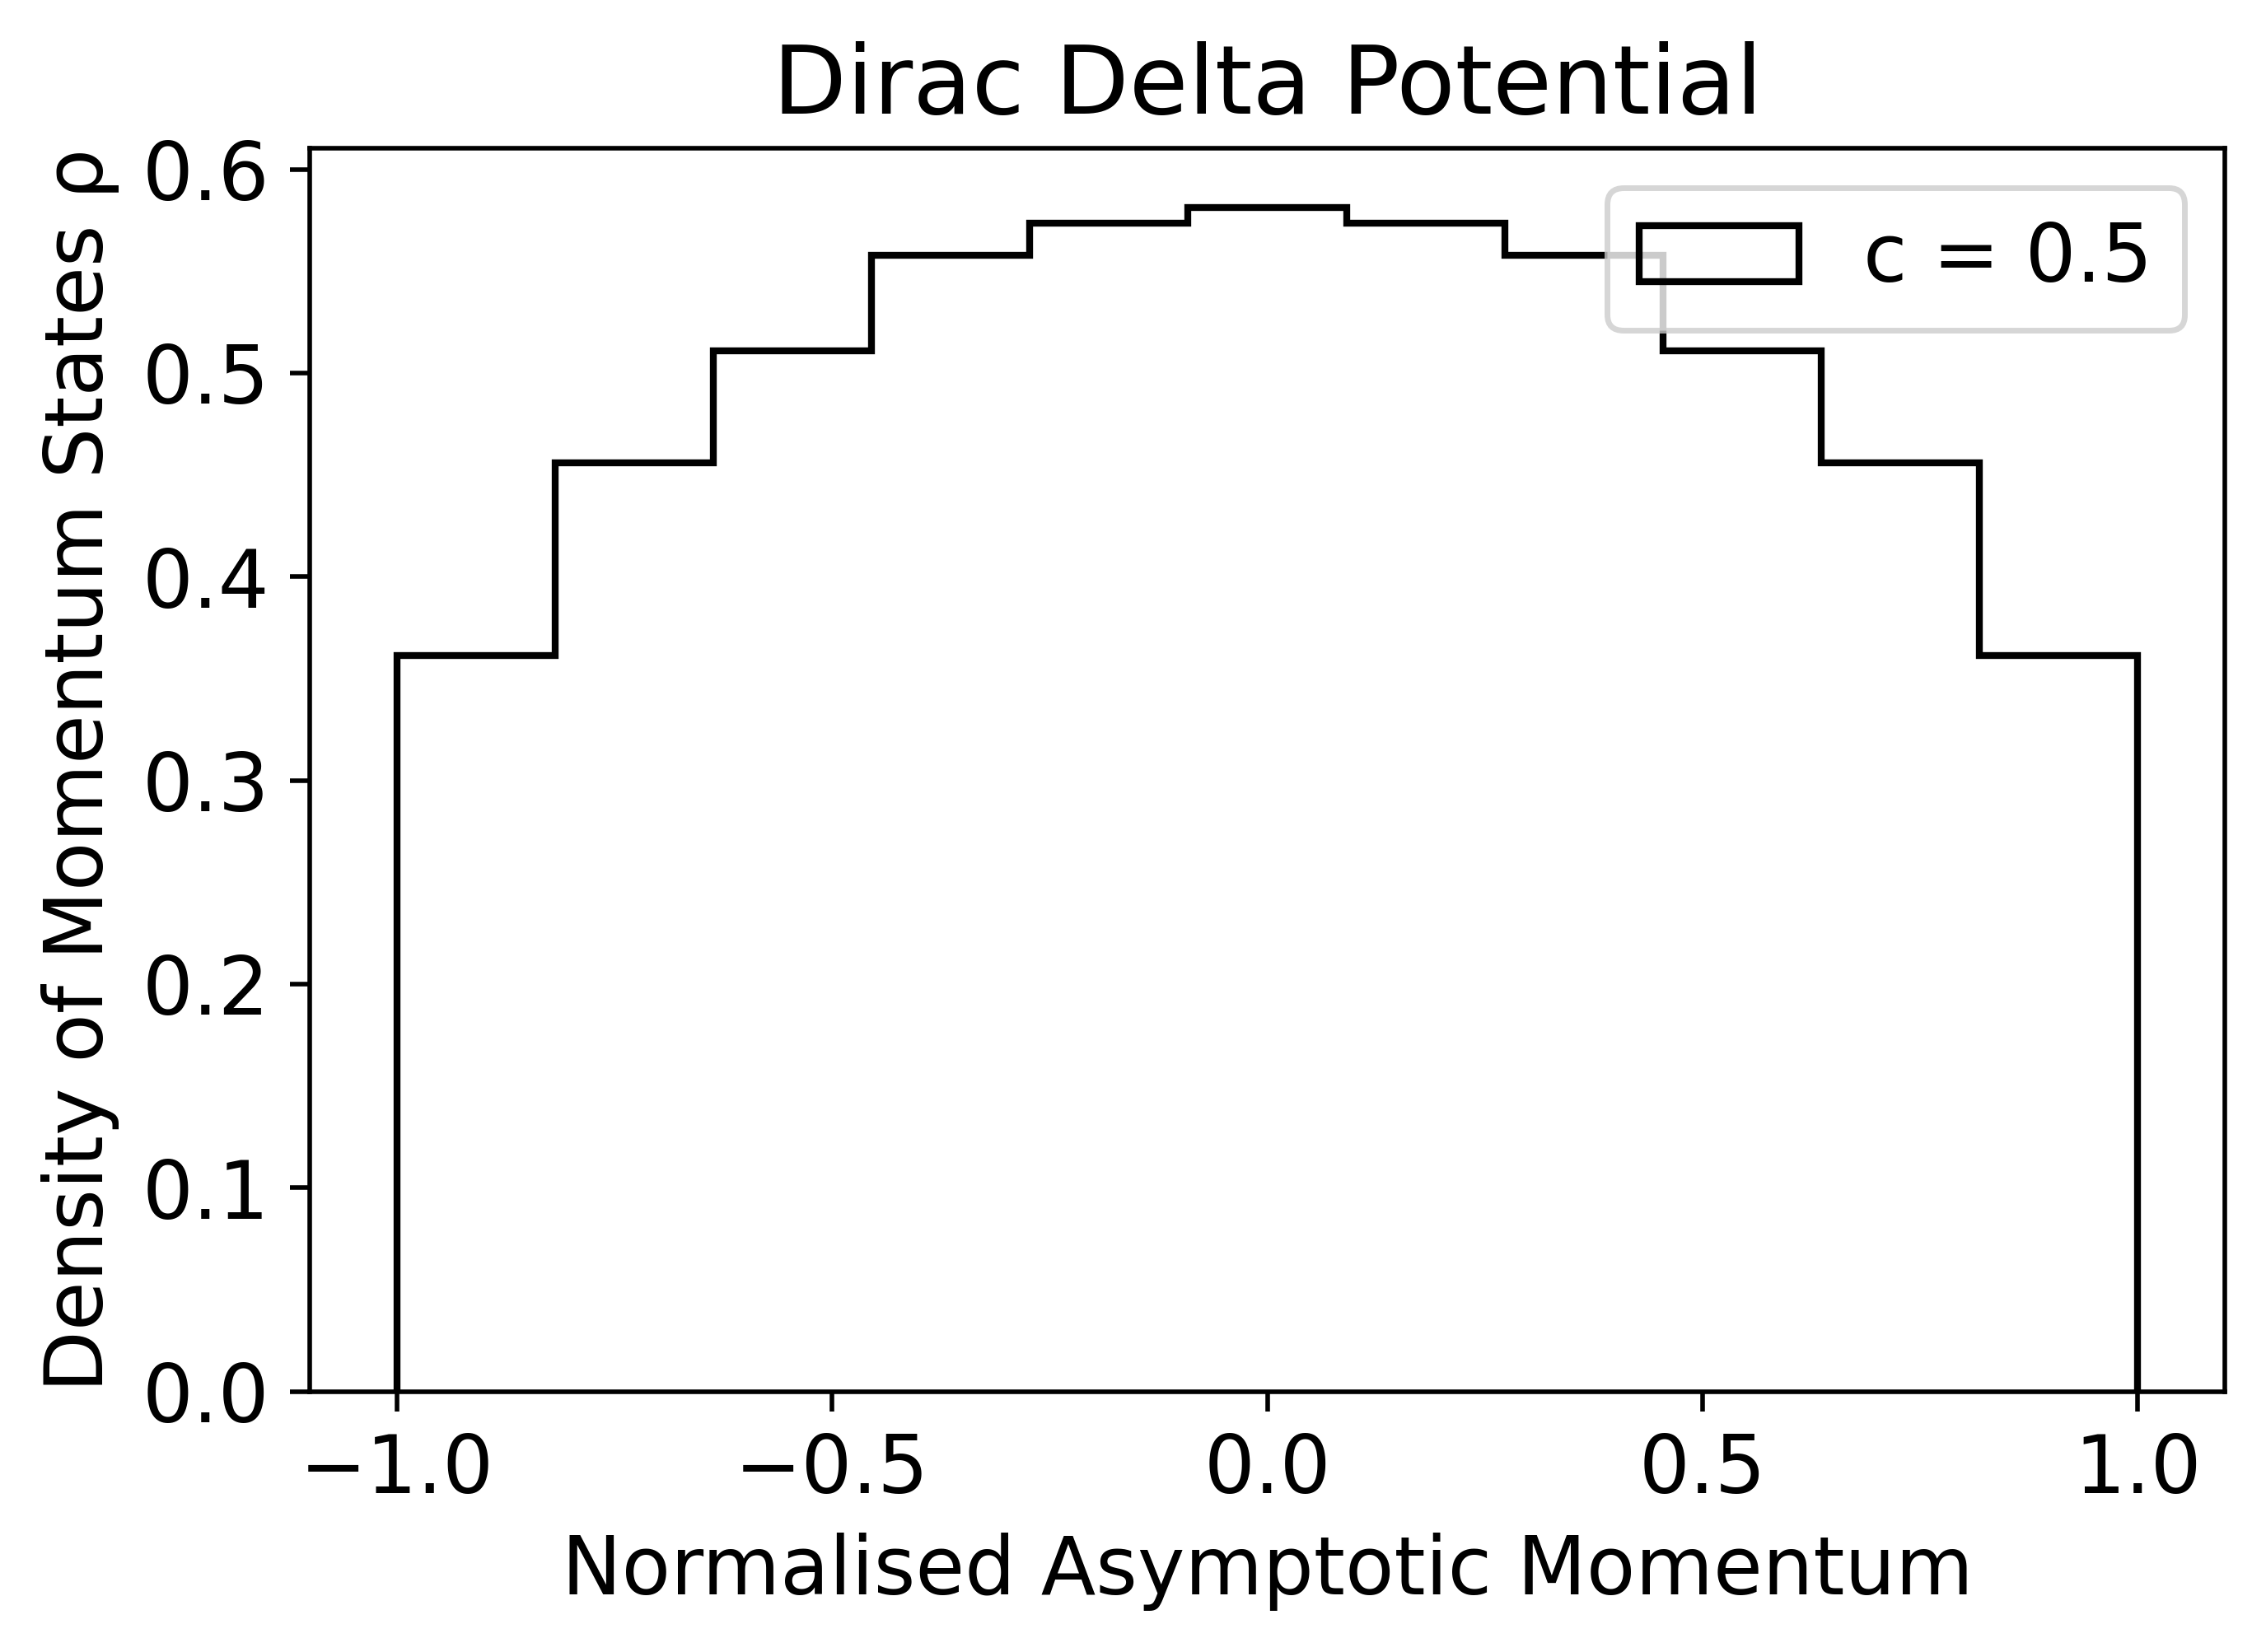

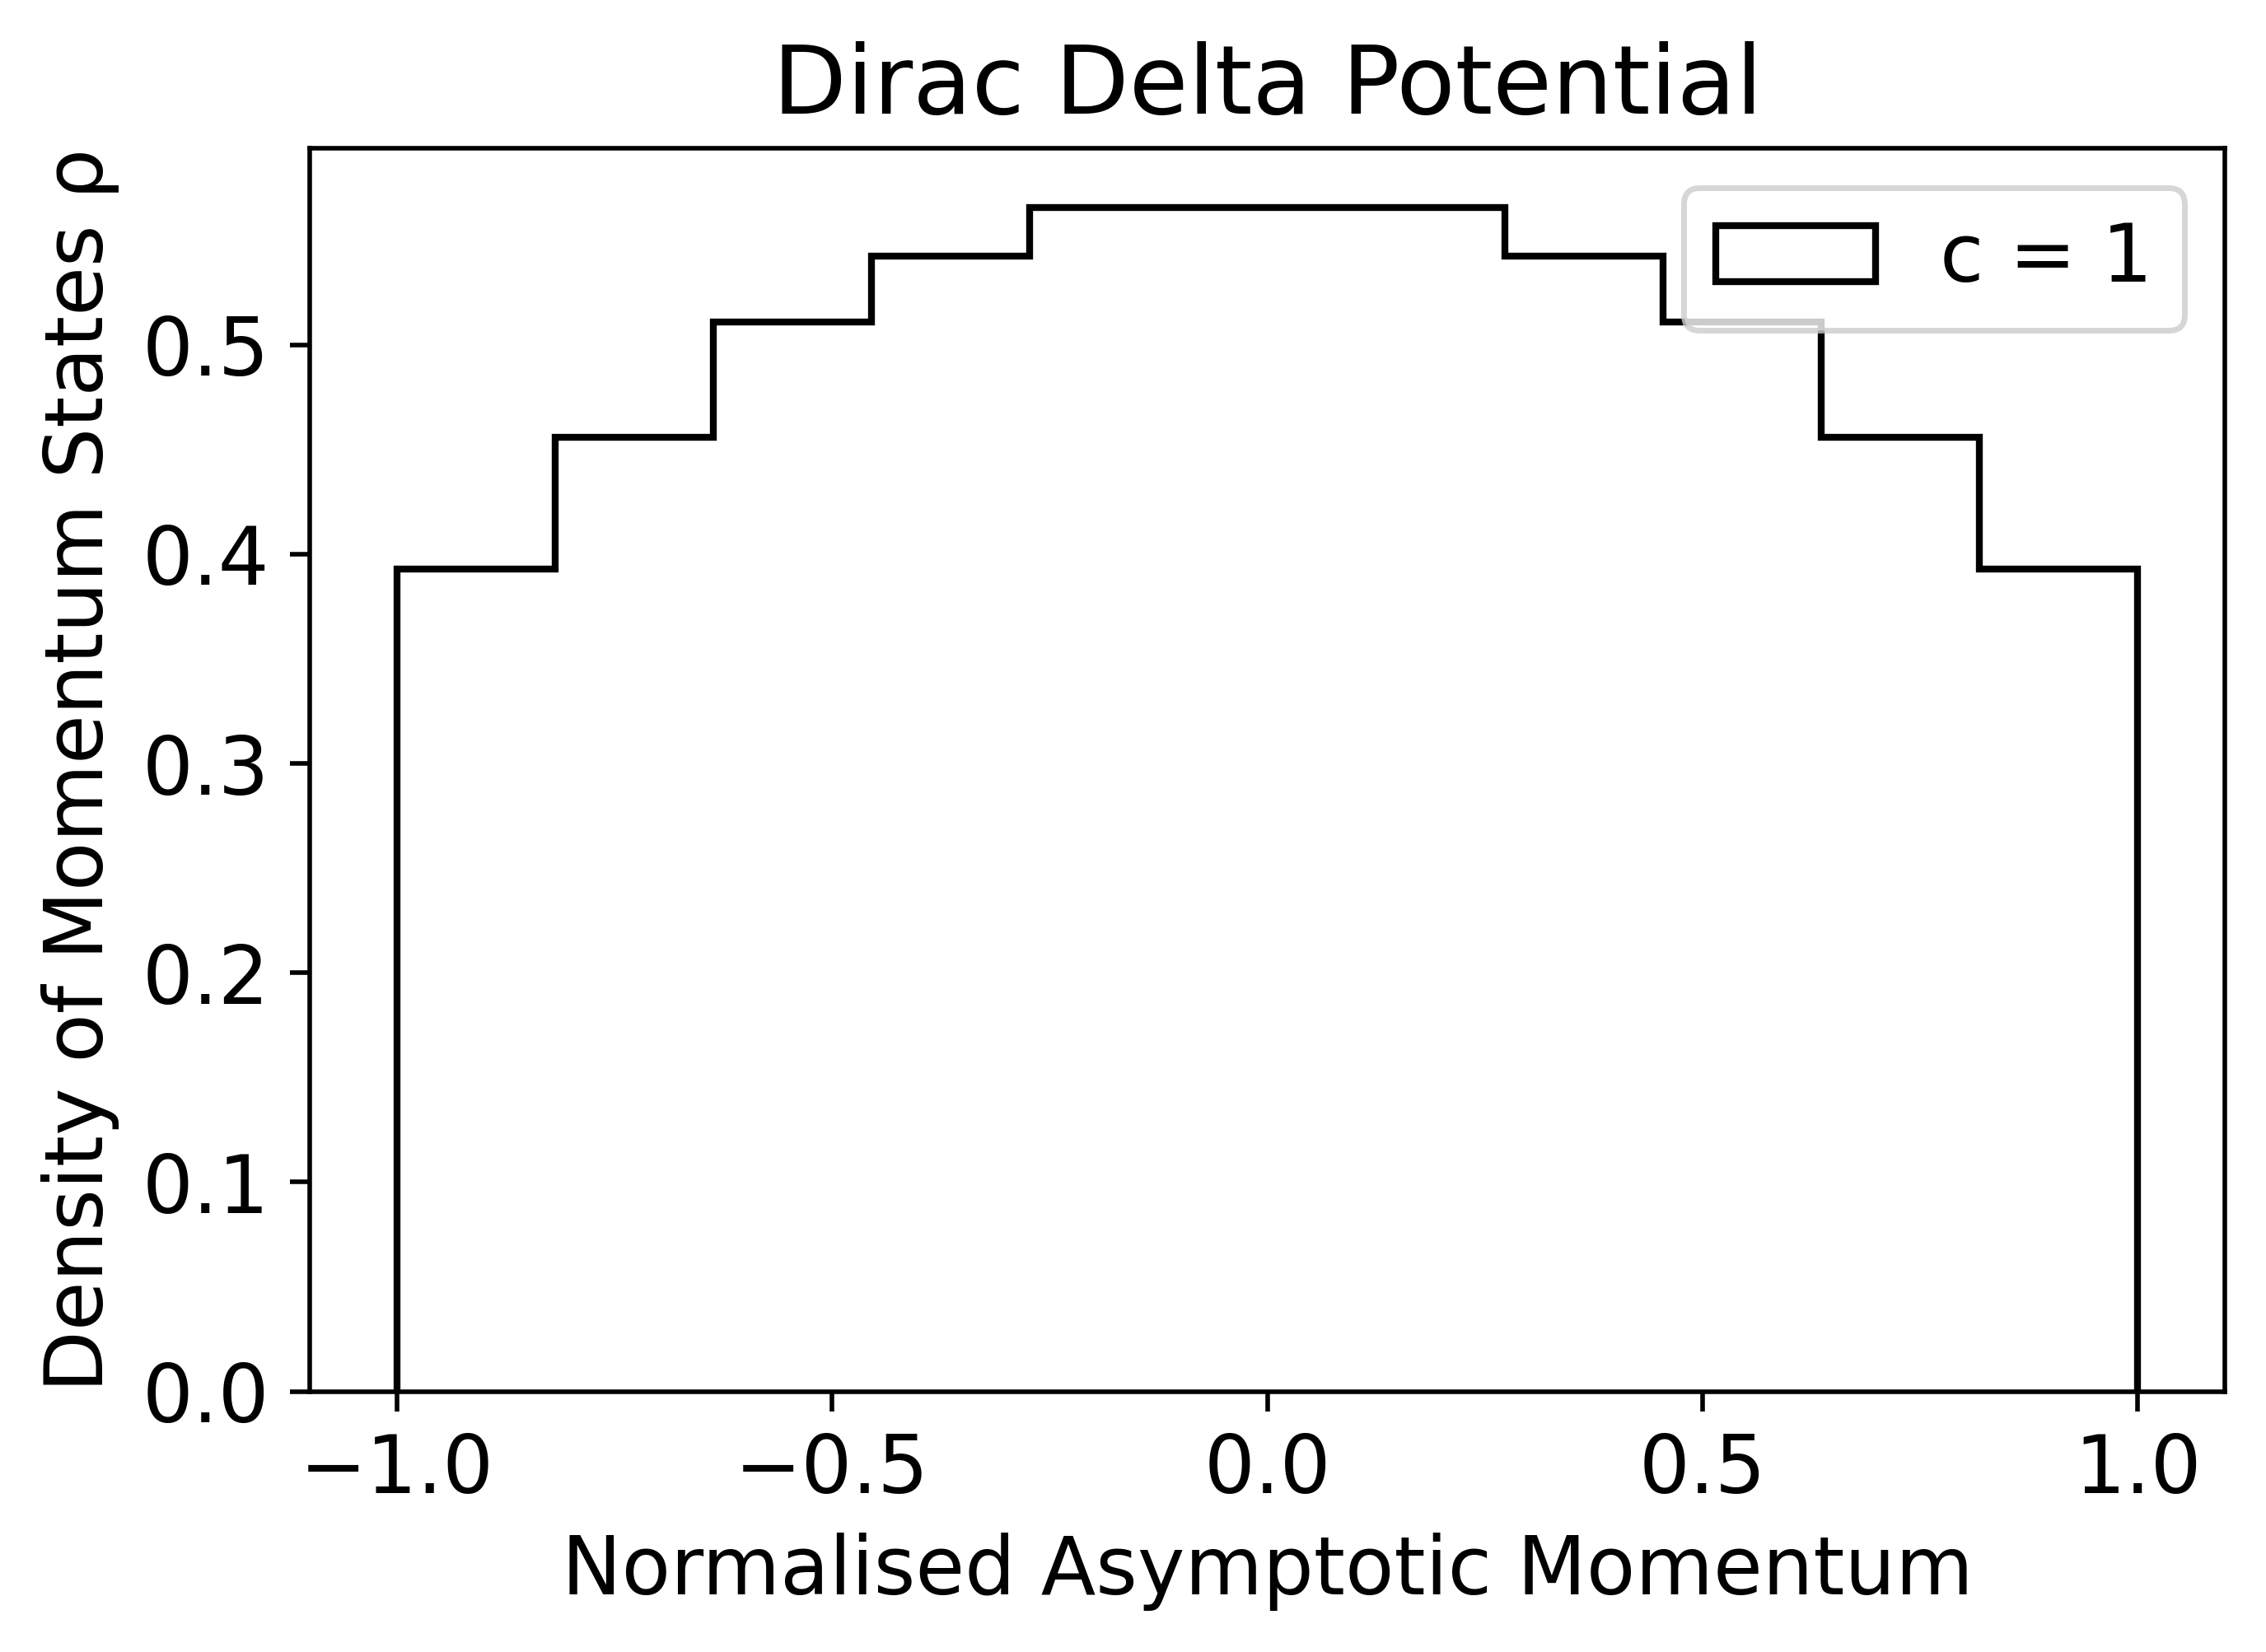

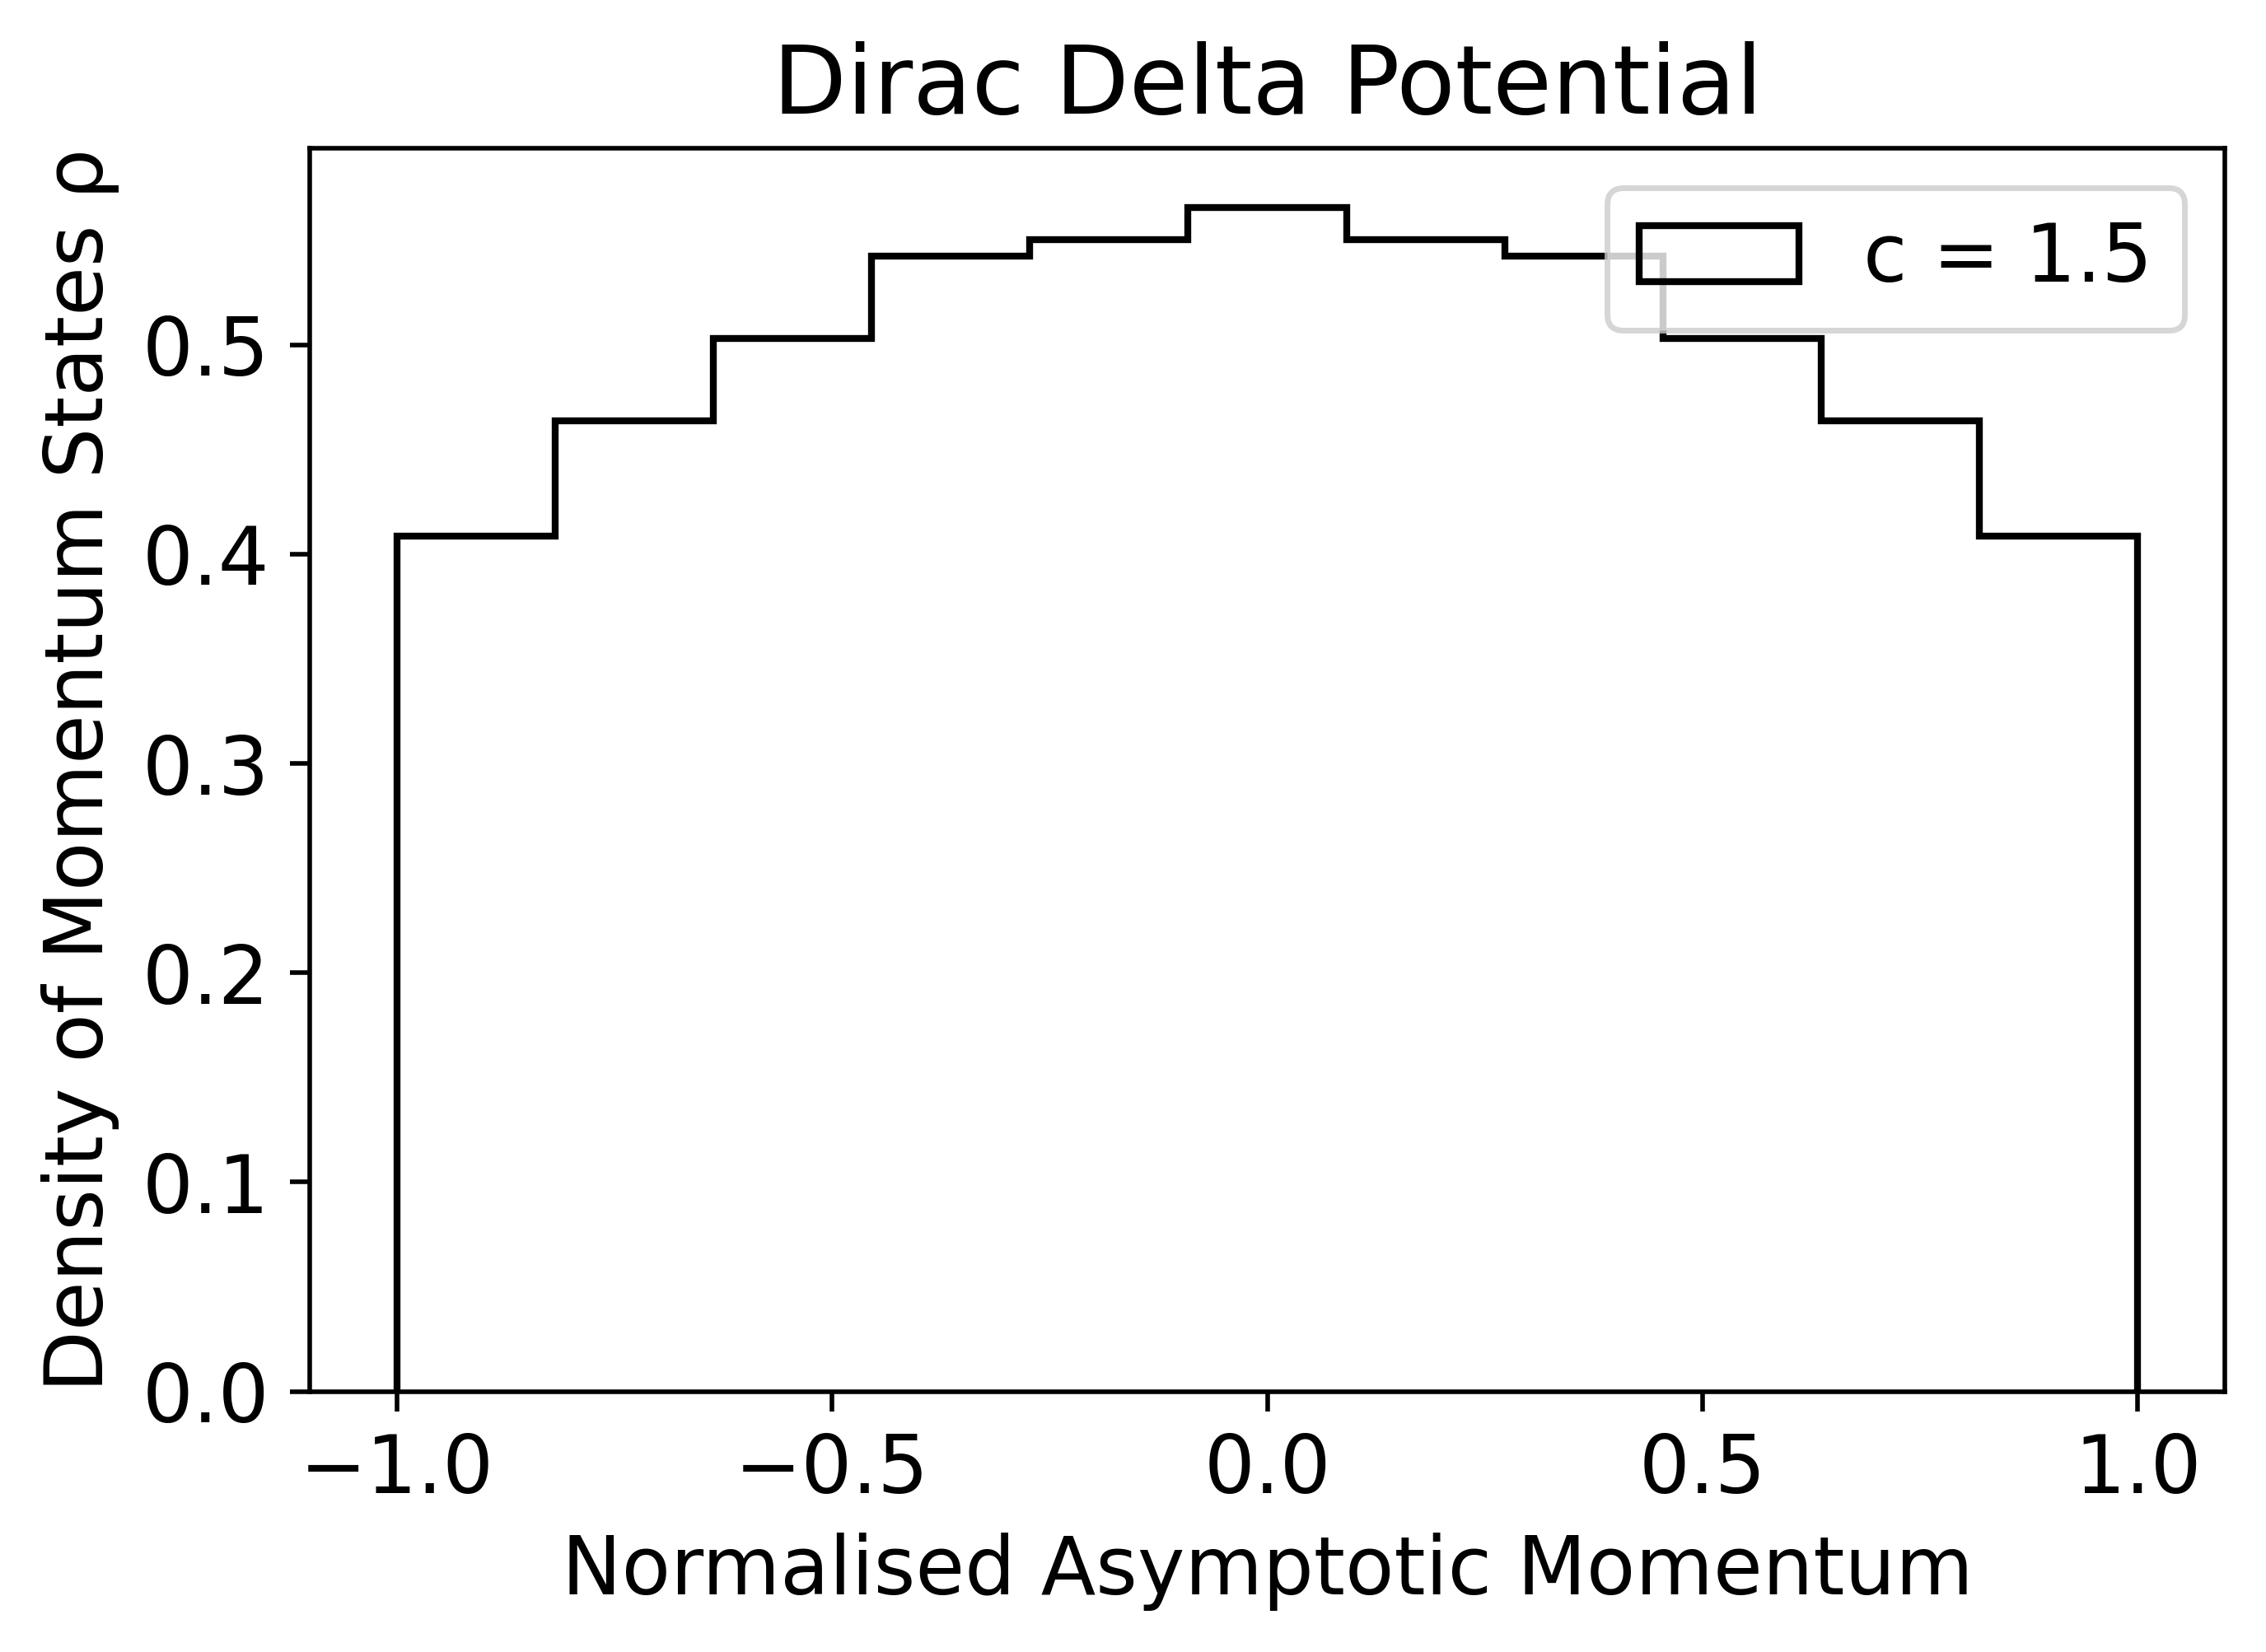

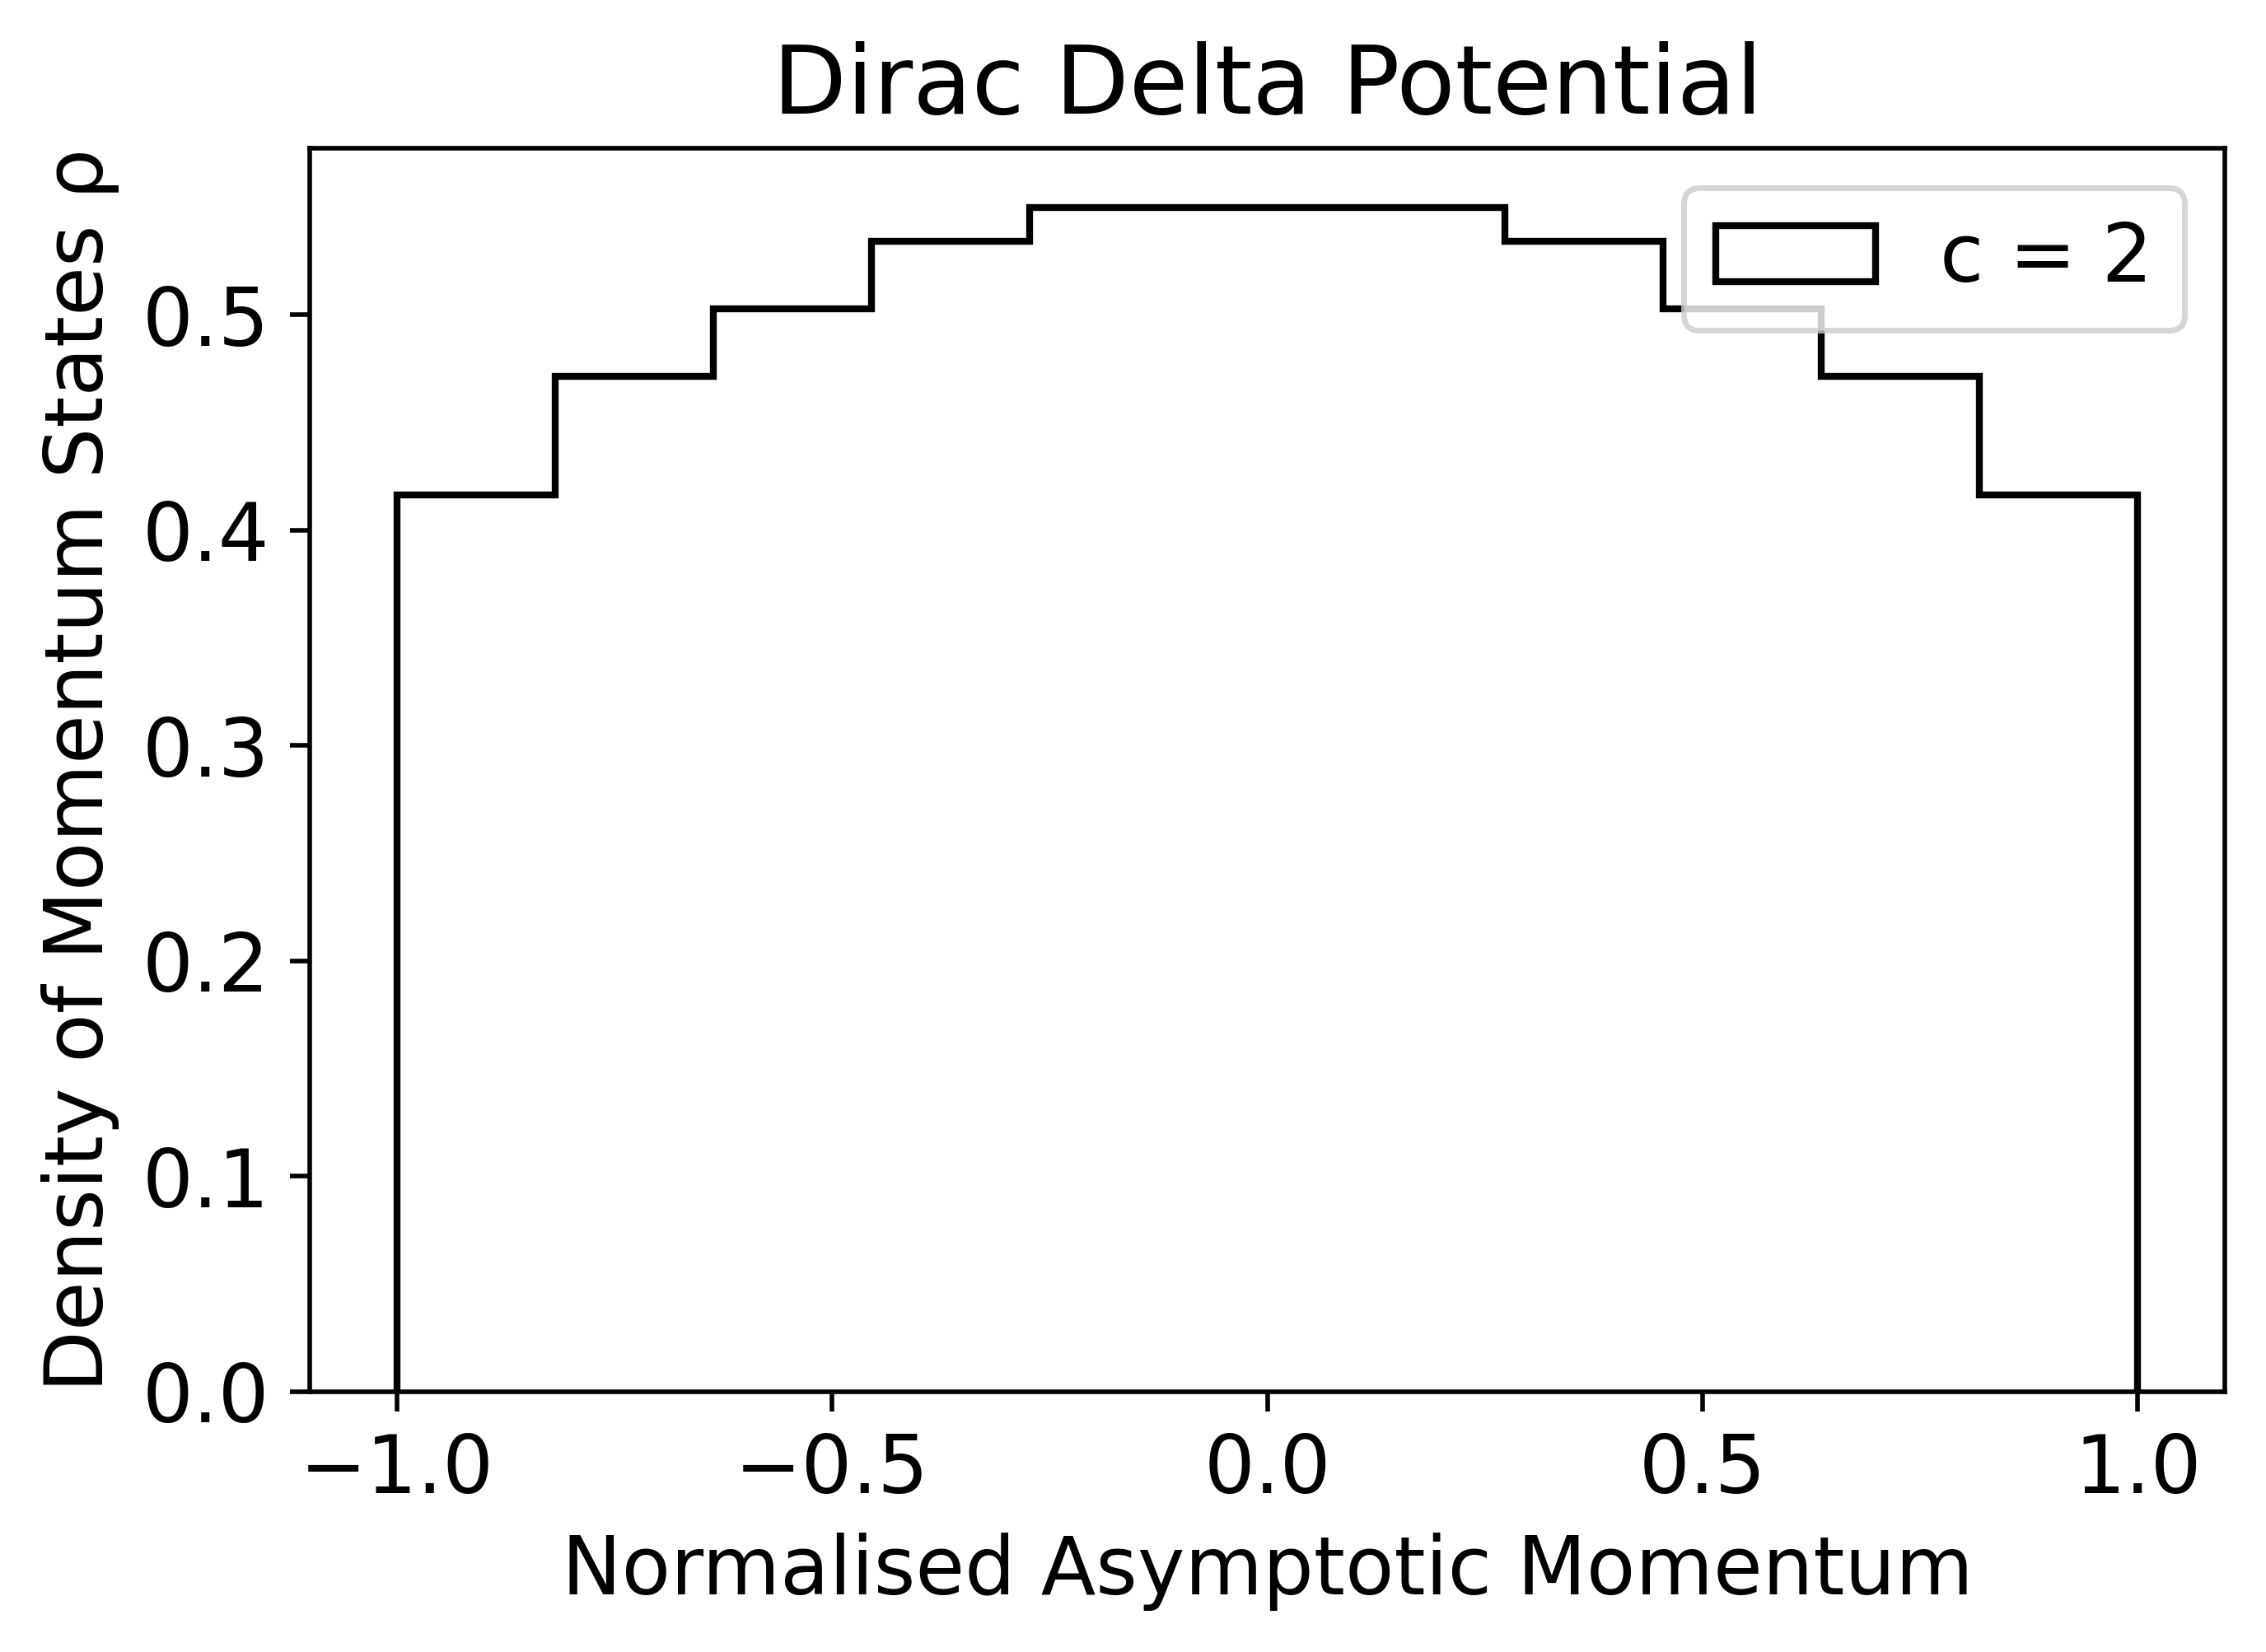

In [16]:
# plt.figure(dpi=500)
# plt.xlabel('Normalised Asymptotic Momentum')
# plt.ylabel('Density of Momentum States ρ')
# plt.title('Dirac Delta Potential')

# for i in range(np.size(cs)):
#     plt.hist(np.hstack(normks[i][-1]), density = True, bins = 'auto', label = "c = %g"%cs[i], edgecolor = 'black', linewidth = 1.2, histtype = 'barstacked')

# plt.legend(loc = 'lower right')
# plt.show()

for i in range(np.size(cs)):
    plt.figure(dpi=500)
    plt.xlabel('Normalised Asymptotic Momentum')
    plt.ylabel('Density of Momentum States ρ')
    plt.title('Dirac Delta Potential')
    plt.hist(np.hstack(normks[i][-1]), density = True, bins = 'auto', label = "c = %g"%cs[i], edgecolor = 'black', linewidth = 1.2, histtype = 'step')
    plt.legend()
    plt.show()

Reflection and Transmission Amplitudes for Distinguishable Particles

In [ ]:
#Antisymmetric phase shift
def antiθ(x):
    return 0
    
def R(x):
    return -0.5*(np.exp(-1j*θ(x))+np.exp(-1j*antiθ(x)))

def T(x):
    return 0.5*(np.exp(-1j*antiθ(x))-np.exp(-1j*θ(x)))

kMax = 5*np.pi
ksForAmplitudes = np.linspace(0, kMax, 1000)

for i in range(np.size(cs)):
    c = cs[i]
    plt.figure(dpi=500)
    plt.xlabel('Asymptotic Momentum k')
    plt.ylabel('Probability')
    plt.title('Dirac Delta Potential (c = %g)'%c)
    plt.plot(ksForAmplitudes, np.absolute(R(ksForAmplitudes))**2, label = "|R|²", color = "r")
    plt.plot(ksForAmplitudes, np.absolute(T(ksForAmplitudes))**2, label = "|T|²", color ="b")
    plt.xticks(np.arange(0, kMax+np.pi, step=(np.pi)), ['0','π','2π','3π','4π','5π'])
    plt.yticks(np.arange(0, 1+0.5, step=(0.5)), ['0','0.5','1'])
    plt.hlines(0, 0, kMax, colors = 'k')
    plt.hlines(1, 0, kMax, colors = 'k')
    plt.vlines(0, 0, 1, colors = 'k')
    plt.grid()
    plt.legend()
    plt.show()